# Project: Nordeus Data Science Challenge

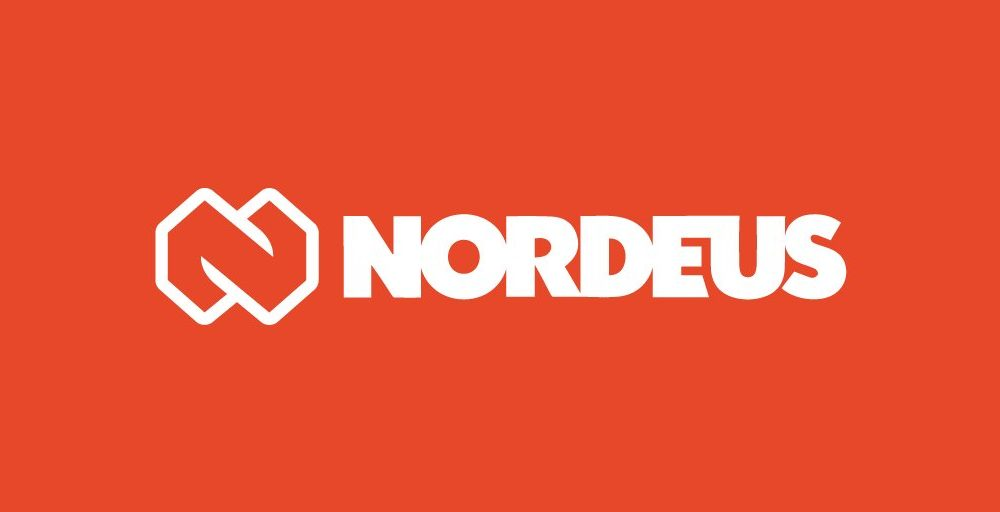

## 1. Introduction

### Overview of the Project

**About the challenge:**
The usual phases tackled while doing ML (Machine Learning) projects are detecting business
opportunities, formalizing the problems, getting and cleaning the data, developing and training
the model, and integrating all into the production pipeline. For this assignment, we defined the
problem, prepared the data for you, and would like to see you develop and train an ML model!
Before making an ideal matchmaking algorithm we want to be able to predict league rank
(position in the league table) at the end of the season in order to provide the most fair and
challenging experience to our users.
We will provide Top Eleven data describing users at the last day of the previous season and id
of the league in the current season.

### Objective of the Project

The goal of this challenge is to **predict league rank** at the
end of the current season for each user within the league.


### Data Description

**Data description**
There are two datasets:
* jobfair_train.csv
* jobfair_test.csv (same as training dataset but without target variable)

**Variable Definition**
- **season:** Season identifier. Within one season, various competitive activities happen, including League Matches, Cups, the Champions League and other matches. Each season lasts for 28 days.
- **club_id:** Unique club number.
- **league_id:** Unique league number. Each league consists of 14 clubs that compete against each other.
- **dynamic_payment_segment:** Segmentation of users:
● ‘0) NonPayer’ - a user who does not spend money in the game.
● ‘1) ExPayer’ - a user who used to spend money in a game but no
longer does.
● ‘2) Minnow’
● ‘3) Dolphin’
● ‘4) Whale’
- **cohort_season:** Number of seasons since the user’s registration date.
- **avg_age_top_11_players:** Average number of years of the top 11 players.
- **avg_stars_top_11_players:** Average number of stars of the top 11 players.
Stars represent the quality of players.
- **avg_stars_top_14_players:** Average number of stars of the top 14 players.
Stars represent the quality of players.
- **avg_training_factor_top_11_players:** Average training factor of the top 12 players.
- **days_active_last_28_days:** Number of days the user was active in the last 28 days.
- **league_match_watched_count_last_28_days:** Number of league matches the user watched in the last 28 days.
- **session_count_last_28_days:** Number of sessions the user had in the last 28 days.
- **playtime_last_28_days:** Total playing time in minutes in the last 28 days.
- **registration_country:** Country of origin of the first session (registration).
- **registration_platform_specific:** Platform through which the user had their first session (registration).
- **league_match_won_count_last_28_days:** Number of wins the user has achieved in league matches in the last 28 days.
- **training_count_last_28_days:** Number of training the user has done in the last 28 days.
- **global_competition_level:** Users can take part in global competition and can progress through this competition system. The higher the competition level the greater the progress the user has made. Users can also opt out from this competition thus having no global_competition_level set.
- **tokens_spent_last_28_days:** Amount of tokens spent in the last 28 days.
tokens_stash Amount of tokens in the stash.
- **rests_stash:** Amount of rests in the stash.
- **morale_boosters_stash:** Amount of morale boosters in the stash.
- **league_rank:** *Target variable*. Position in the league table at the end of the season.
1 - means club finished first in the league
14 - means club finished last in the league
This field is available only in the training and not in the test dataset.

## Table of Contents

1. [Introduction](#Introduction)
   - [Overview of the Project](#overview-of-the-project)
   - [Objective: Predicting League Rank](#objective-predicting-league-rank)
   - [Data Description](#data-description)

3. [Data Exploration and Preprocessing](#data-exploration-and-preprocessing)
   - [Loading and Inspecting the Data](#loading-and-inspecting-the-data)
   - [Handling Missing Values](#handling-missing-values)
   - [Feature Engineering](#feature-engineering)
   - [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
      - [Visualizations of dataset](#visualizations-of-dataset)
      - [Detection of Outliers](#detection-of-outliers)
4. [Correlation Analysis](#correlation-analysis)
   - [Statistical Tests](#statistical-tests)

4. [Model Development](#model-development)
   - [Data Splitting (Train-Test Split)](#data-splitting-train-test-split)
   - [Creating Pipeline](#creating-pipeline)
   - [Model Selection](#model-selection)
   - [Model Evaluation](#model-evaluation)
    - [Evaluation Metric: Mean Absolute Error (MAE)](#evaluation-metric-mean-absolute-error-mae)

5. [Hyperparameter Tuning](#Hyperparameter-Tuning)
   - [Ensemble Method](#ensemble-method)
   - [Model Comparison and Selection](#model-comparison-and-selection)

6. [Prediction on Test Data](#prediction-on-test-data)
   - [Preprocessing Test Data](#preprocessing-test-data)
   - [Making Predictions](#making-predictions)
   - [Saving Predictions to CSV](#saving-predictions-to-csv)

7. [Appendix of Additional Analysis](#appendix-of-additional-analysis)
   - [Dropping Independent Variables of High Correllation](#dropping-independent-variables-of-high-correllation)
   - [Sensitivity Analysis (Outlier Removal)](#sensitivity-analysis-outlier-removal)
   - [Using Extra Feature Engineering](#using-extra-feature-engineering)
   - [Addressing Skewness of Variables](#addressing-skewness-of-variables)
   - [Feature Selection Methods](#feature-selection-methods)
   - [Experimenting Ensemble Methods](#experimenting-ensemble-methods)


## 2. Data Exploration and Preprocessing

### Imports

In [ ]:
!pip install xgboost

In [ ]:
!pip install -U ydata-profiling

In [ ]:
!pip install --upgrade typing-extensions

In [ ]:
!pip install -U ydata-profiling[notebook]

In [ ]:
!pip install --q sweetviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, HuberRegressor, TheilSenRegressor, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import pearsonr
from ydata_profiling import ProfileReport
import sklearn
import joblib

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Loading and Inspecting the Data

In [ ]:
# Import dataset and preview it
data_raw = pd.read_csv('jobfair_train.csv')
data = data_raw.copy()
data.head()

season   club_id  league_id dynamic_payment_segment  cohort_season  \
0     173   6042825    2912348               2) Minnow            134   
1     173   9620967    2912140               2) Minnow             28   
2     173   6045474    2912933                4) Whale            136   
3     173  14187773    2910371             0) NonPayer              2   
4     173  13694853    2907632             0) NonPayer              5   

   avg_age_top_11_players  avg_stars_top_11_players  avg_stars_top_14_players  \
0                      25                  5.255151                  4.483009   
1                      23                  4.962521                  4.785648   
2                      23                 11.105782                 10.511133   
3                      21                  4.164848                  4.023486   
4                      22                  3.031939                  2.926029   

   avg_training_factor_top_11_players  days_active_last_28_days  ...  \
0                            1.778801                        25  ...   
1                           -0.002687                        28  ...   
2                            0.628794                        28  ...   
3                            0.551904                        12  ...   
4                            0.690544                         0  ...   

   registration_country  registration_platform_specific  \
0              Portugal                 Flash FB Canvas   
1                Turkey                   Android Phone   
2               Belgium                 Flash FB Canvas   
3              Malaysia                   Android Phone   
4                 Italy                       iOS Phone   

   league_match_won_count_last_28_days training_count_last_28_days  \
0                                   24                         435   
1                                   19                          58   
2                                   26                         116   
3                                   11                          22   
4                                    9                           0   

  global_competition_level  tokens_spent_last_28_days  tokens_stash  \
0                     11.0                        598           245   
1                      7.0                        269             0   
2                      8.0                      23180           369   
3                      2.0                         41            43   
4                      4.0                          0            16   

   rests_stash  morale_boosters_stash  league_rank  
0          186                    818            2  
1           35                     24            2  
2          444                   4933            1  
3          213                    126            6  
4          100                    147           10  

[5 rows x 23 columns]

In [ ]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   season                                   55314 non-null  int64  
 1   club_id                                  55314 non-null  int64  
 2   league_id                                55314 non-null  int64  
 3   dynamic_payment_segment                  55314 non-null  object 
 4   cohort_season                            55314 non-null  int64  
 5   avg_age_top_11_players                   55314 non-null  int64  
 6   avg_stars_top_11_players                 55314 non-null  float64
 7   avg_stars_top_14_players                 55314 non-null  float64
 8   avg_training_factor_top_11_players       55314 non-null  float64
 9   days_active_last_28_days                 55314 non-null  int64  
 10  league_match_watched_count_last_28_days  55314

In [ ]:
# Descriptive statistics of our dataset
data.describe()

season       club_id     league_id  cohort_season  \
count  55314.0  5.531400e+04  5.531400e+04   55314.000000   
mean     173.0  1.210977e+07  2.909804e+06      23.409372   
std        0.0  3.384016e+06  2.102140e+03      42.009274   
min      173.0  2.750000e+02  2.904743e+06       1.000000   
25%      173.0  1.151105e+07  2.907961e+06       2.000000   
50%      173.0  1.392822e+07  2.910038e+06       4.000000   
75%      173.0  1.424454e+07  2.911697e+06      17.000000   
max      173.0  1.451477e+07  2.912940e+06     172.000000   

       avg_age_top_11_players  avg_stars_top_11_players  \
count            55314.000000              55314.000000   
mean                23.718661                  4.533516   
std                  2.206240                  1.204753   
min                 18.000000                  1.451697   
25%                 22.000000                  3.691136   
50%                 23.000000                  4.481376   
75%                 25.000000                  5.217394   
max                 33.000000                 23.716073   

       avg_stars_top_14_players  avg_training_factor_top_11_players  \
count              55314.000000                        55314.000000   
mean                   4.344776                            0.584372   
std                    1.177068                            0.178090   
min                    1.354905                           -1.287736   
25%                    3.500062                            0.479571   
50%                    4.311590                            0.561158   
75%                    5.021726                            0.648180   
max                   20.434876                            5.164494   

       days_active_last_28_days  league_match_watched_count_last_28_days  \
count              55314.000000                             55314.000000   
mean                  12.357089                                 3.623170   
std                   11.849102                                 5.906055   
min                    0.000000                                 0.000000   
25%                    1.000000                                 0.000000   
50%                    7.000000                                 0.000000   
75%                   27.000000                                 5.000000   
max                   28.000000                                26.000000   

       session_count_last_28_days  playtime_last_28_days  \
count                55314.000000           5.531400e+04   
mean                    63.432169           2.955178e+07   
std                    101.831670           5.233892e+07   
min                      0.000000           0.000000e+00   
25%                      1.000000           7.364150e+04   
50%                     16.000000           6.230431e+06   
75%                     89.000000           3.768711e+07   
max                   1365.000000           1.340479e+09   

       league_match_won_count_last_28_days  training_count_last_28_days  \
count                         55314.000000                 55314.000000   
mean                             12.411813                    61.107694   
std                               6.403013                   188.288285   
min                               0.000000                     0.000000   
25%                               8.000000                     0.000000   
50%                              12.000000                    11.000000   
75%                              17.000000                    63.000000   
max                              26.000000                  7443.000000   

       global_competition_level  tokens_spent_last_28_days   tokens_stash  \
count              37763.000000               55314.000000   55314.000000   
mean                   3.901014                 121.393897     113.133077   
std                    2.625576                 842.775529    3183.550398   
min                    1.000000                   0.000000   -4975.000000   

### Handling Missing Values

In [ ]:
# Check number of missing values in 'global_competition_level'
data.isnull().sum()

season                                         0
club_id                                        0
league_id                                      0
dynamic_payment_segment                        0
cohort_season                                  0
avg_age_top_11_players                         0
avg_stars_top_11_players                       0
avg_stars_top_14_players                       0
avg_training_factor_top_11_players             0
days_active_last_28_days                       0
league_match_watched_count_last_28_days        0
session_count_last_28_days                     0
playtime_last_28_days                          0
registration_country                           0
registration_platform_specific                 0
league_match_won_count_last_28_days            0
training_count_last_28_days                    0
global_competition_level                   17551
tokens_spent_last_28_days                      0
tokens_stash                                   0
rests_stash         

In [ ]:
# Imputing missing values with 0 in 'global_competition_level'
imputer = SimpleImputer(strategy='constant', fill_value=0)
data['global_competition_level'] = imputer.fit_transform(data[['global_competition_level']])

In [ ]:
# Check unique values of 'global_competition_level'
data['global_competition_level'].unique()

array([11.,  7.,  8.,  2.,  4.,  3.,  6.,  0.,  1., 10.,  5.,  9.])

In [ ]:
# Convert 'global_competition_level' to int64
data['global_competition_level'] = data['global_competition_level'].astype(int)

In [ ]:
# Check for duplicates
data.duplicated().sum()

0

### Feature Engineering

In [ ]:
# Check number of unique values in column 'registration_country'
data['registration_country'].nunique()

186

In [ ]:
data['registration_country'].unique()

array(['Portugal', 'Turkey', 'Belgium', 'Malaysia', 'Italy', 'Cambodia',
       'Indonesia', 'Algeria', 'Spain', 'Costa Rica', 'Argentina',
       'Germany', 'Saudi Arabia', 'Thailand', 'Austria',
       'Korea, Republic of', 'South Africa', 'Romania', 'Greece',
       'Netherlands', 'Bulgaria', 'Czech Republic', 'Nigeria', 'France',
       'Somalia', 'Brazil', 'United States', 'Chile', 'Poland',
       'United Kingdom', 'Israel', 'Jersey', 'Bosnia and Herzegovina',
       'Norway', 'Cyprus', 'Slovakia', 'Ireland', 'Switzerland', 'Mexico',
       'Uruguay', 'Andorra', 'Japan', 'Serbia', 'India', 'Egypt',
       'Slovenia', 'Albania', 'Croatia', 'Canada', 'China', 'Botswana',
       'Colombia', 'Sweden', 'Niger', 'Azerbaijan', 'Ukraine', 'Ecuador',
       'Russian Federation', 'Senegal', 'Luxembourg', 'Myanmar', 'Monaco',
       'Georgia', 'Vietnam', 'Tunisia', 'Hong Kong', 'Peru', 'Dominica',
       'Bangladesh', 'Lebanon', 'Venezuela', 'Hungary', 'Uzbekistan',
       'Congo, The Democ

We will map countries to continents in order to reduce dimensionality in machine learning models. This will simplify the representation of geographical information, capture underlying patterns that contribute to the target variable and will also reduse noise.

In [ ]:
# Mapping of countries to continents
country_to_continent = {
    'Portugal': 'Europe',
    'Turkey': 'Asia',
    'Belgium': 'Europe',
    'Malaysia': 'Asia',
    'Italy': 'Europe',
    'Cambodia': 'Asia',
    'Indonesia': 'Asia',
    'Algeria': 'Africa',
    'Spain': 'Europe',
    'Costa Rica': 'North America',
    'Argentina': 'South America',
    'Germany': 'Europe',
    'Saudi Arabia': 'Asia',
    'Thailand': 'Asia',
    'Austria': 'Europe',
    'Korea, Republic of': 'Asia',
    'South Africa': 'Africa',
    'Romania': 'Europe',
    'Greece': 'Europe',
    'Netherlands': 'Europe',
    'Bulgaria': 'Europe',
    'Czech Republic': 'Europe',
    'Nigeria': 'Africa',
    'France': 'Europe',
    'Somalia': 'Africa',
    'Brazil': 'South America',
    'United States': 'North America',
    'Chile': 'South America',
    'Poland': 'Europe',
    'United Kingdom': 'Europe',
    'Israel': 'Asia',
    'Jersey': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Norway': 'Europe',
    'Cyprus': 'Asia',
    'Slovakia': 'Europe',
    'Ireland': 'Europe',
    'Switzerland': 'Europe',
    'Mexico': 'North America',
    'Uruguay': 'South America',
    'Andorra': 'Europe',
    'Japan': 'Asia',
    'Serbia': 'Europe',
    'India': 'Asia',
    'Egypt': 'Africa',
    'Slovenia': 'Europe',
    'Albania': 'Europe',
    'Croatia': 'Europe',
    'Canada': 'North America',
    'China': 'Asia',
    'Botswana': 'Africa',
    'Colombia': 'South America',
    'Sweden': 'Europe',
    'Niger': 'Africa',
    'Azerbaijan': 'Asia',
    'Ukraine': 'Europe',
    'Ecuador': 'South America',
    'Russian Federation': 'Europe',
    'Senegal': 'Africa',
    'Luxembourg': 'Europe',
    'Myanmar': 'Asia',
    'Monaco': 'Europe',
    'Georgia': 'Asia',
    'Vietnam': 'Asia',
    'Tunisia': 'Africa',
    'Hong Kong': 'Asia',
    'Peru': 'South America',
    'Dominica': 'North America',
    'Bangladesh': 'Asia',
    'Lebanon': 'Asia',
    'Venezuela': 'South America',
    'Hungary': 'Europe',
    'Uzbekistan': 'Asia',
    'Congo, The Democratic Republic of the': 'Africa',
    'New Zealand': 'Oceania',
    'Afghanistan': 'Asia',
    'Nicaragua': 'North America',
    'Iraq': 'Asia',
    'Jordan': 'Asia',
    'Morocco': 'Africa',
    "Cote D'Ivoire": 'Africa',
    'Yemen': 'Asia',
    'Denmark': 'Europe',
    'Reunion': 'Africa',
    'Haiti': 'North America',
    'Macedonia': 'Europe',
    'United Arab Emirates': 'Asia',
    'Ghana': 'Africa',
    'Oman': 'Asia',
    'Malta': 'Europe',
    'Australia': 'Oceania',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'Kazakhstan': 'Asia',
    'Philippines': 'Asia',
    'Taiwan': 'Asia',
    'Guatemala': 'North America',
    'Finland': 'Europe',
    'Kuwait': 'Asia',
    'Benin': 'Africa',
    'Singapore': 'Asia',
    'Europe': 'Europe',
    'Sudan': 'Africa',
    'Armenia': 'Asia',
    'Macau': 'Asia',
    'Kenya': 'Africa',
    'Barbados': 'North America',
    'Iran, Islamic Republic of': 'Asia',
    'Trinidad and Tobago': 'North America',
    'Lithuania': 'Europe',
    'Paraguay': 'South America',
    'Gabon': 'Africa',
    'Moldova, Republic of': 'Europe',
    'Libya': 'Africa',
    'Rwanda': 'Africa',
    'Kosovo': 'Europe',
    'Cameroon': 'Africa',
    'Honduras': 'North America',
    'Zimbabwe': 'Africa',
    'El Salvador': 'North America',
    'Mauritania': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Seychelles': 'Africa',
    'Brunei Darussalam': 'Asia',
    'Mongolia': 'Asia',
    'Fiji': 'Oceania',
    'Montenegro': 'Europe',
    'Belarus': 'Europe',
    'Pakistan': 'Asia',
    'Congo': 'Africa',
    'Tanzania, United Republic of': 'Africa',
    'Mali': 'Africa',
    'Jamaica': 'North America',
    'Panama': 'North America',
    'Angola': 'Africa',
    'Bolivia': 'South America',
    'Palestinian Territory': 'Asia',
    'Estonia': 'Europe',
    'Equatorial Guinea': 'Africa',
    'Bahrain': 'Asia',
    'Mauritius': 'Africa',
    'Turkmenistan': 'Asia',
    'Qatar': 'Asia',
    'Unknown': 'Unknown',
    "Lao People's Democratic Republic": 'Asia',
    'Latvia': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Zambia': 'Africa',
    'Mozambique': 'Africa',
    'Martinique': 'North America',
    'Tajikistan': 'Asia',
    'Bahamas': 'North America',
    'French Polynesia': 'Oceania',
    'Cape Verde': 'Africa',
    'Uganda': 'Africa',
    'Burkina Faso': 'Africa',
    'Dominican Republic': 'North America',
    'Guadeloupe': 'North America',
    'Puerto Rico': 'North America',
    'Mayotte': 'Africa',
    'Anguilla': 'North America',
    'Greenland': 'North America',
    'Madagascar': 'Africa',
    'Iceland': 'Europe',
    'Sri Lanka': 'Asia',
    'South Sudan': 'Africa',
    'Guernsey': 'Europe',
    'Lesotho': 'Africa',
    'Togo': 'Africa',
    'Liberia': 'Africa',
    'Ethiopia': 'Africa',
    'French Guiana': 'South America',
    'Sierra Leone': 'Africa',
    'Turks and Caicos Islands': 'North America',
    'Belize': 'North America',
    'Anonymous Proxy': 'Unknown',
    'Timor-Leste': 'Asia',
    'Sao Tome and Principe': 'Africa',
    'Isle of Man': 'Europe',
    'New Caledonia': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Guam': 'Oceania',
    'Maldives': 'Asia',
    'Faroe Islands': 'Europe',
    'Aruba': 'North America',
    'Gambia': 'Africa'
}

# Create a new 'continent' column based on the mapping
data['continent'] = data['registration_country'].map(country_to_continent)

In [ ]:
data['continent'].unique()

array(['Europe', 'Asia', 'Africa', 'North America', 'South America',
       'Oceania', 'Unknown'], dtype=object)

In [ ]:
# Find rows where 'continent' is 'Unknown'
unknown_rows = data[data['continent'] == 'Unknown']

# Display the count and unique entries
print("Number of rows with 'Unknown' continent:", len(unknown_rows))
print("Unique entries with 'Unknown' continent:")
print(unknown_rows['registration_country'].unique())

Number of rows with 'Unknown' continent: 31
Unique entries with 'Unknown' continent:
['Unknown' 'Anonymous Proxy']


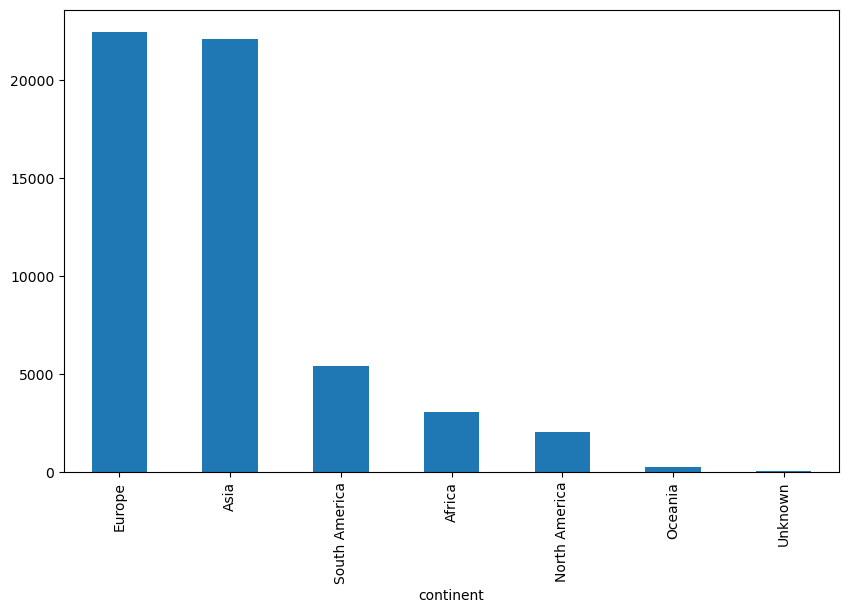

In [ ]:
# Plot the 'continent' column
data['continent'].value_counts().plot(kind='bar', figsize=(10,6))
plt.show()

### Exploratory Data Analysis (EDA)

In [ ]:
# Check unique values in column 'dynamic_payment_segment'
data['dynamic_payment_segment'].unique()

array(['2) Minnow', '4) Whale', '0) NonPayer', '1) ExPayer', '3) Dolphin'],
      dtype=object)

In [ ]:
# Check unique values in column 'registration_platform_specific'
data['registration_platform_specific'].unique()

array(['Flash FB Canvas', 'Android Phone', 'iOS Phone', 'Android Tablet',
       'iOS Tablet', 'UniversalWindows PC', 'WebGL FB Canvas',
       'WebGL TE Site', 'WebGL or Flash FB Canvas', 'Flash TE Site',
       'WebGL or Flash TE Site'], dtype=object)

Before visualizing properly and in more detail our dataset let's have a rough idea of what is going on with our features. Next we will use some professional libraries for visualizations in order to dive into deeper our variables.

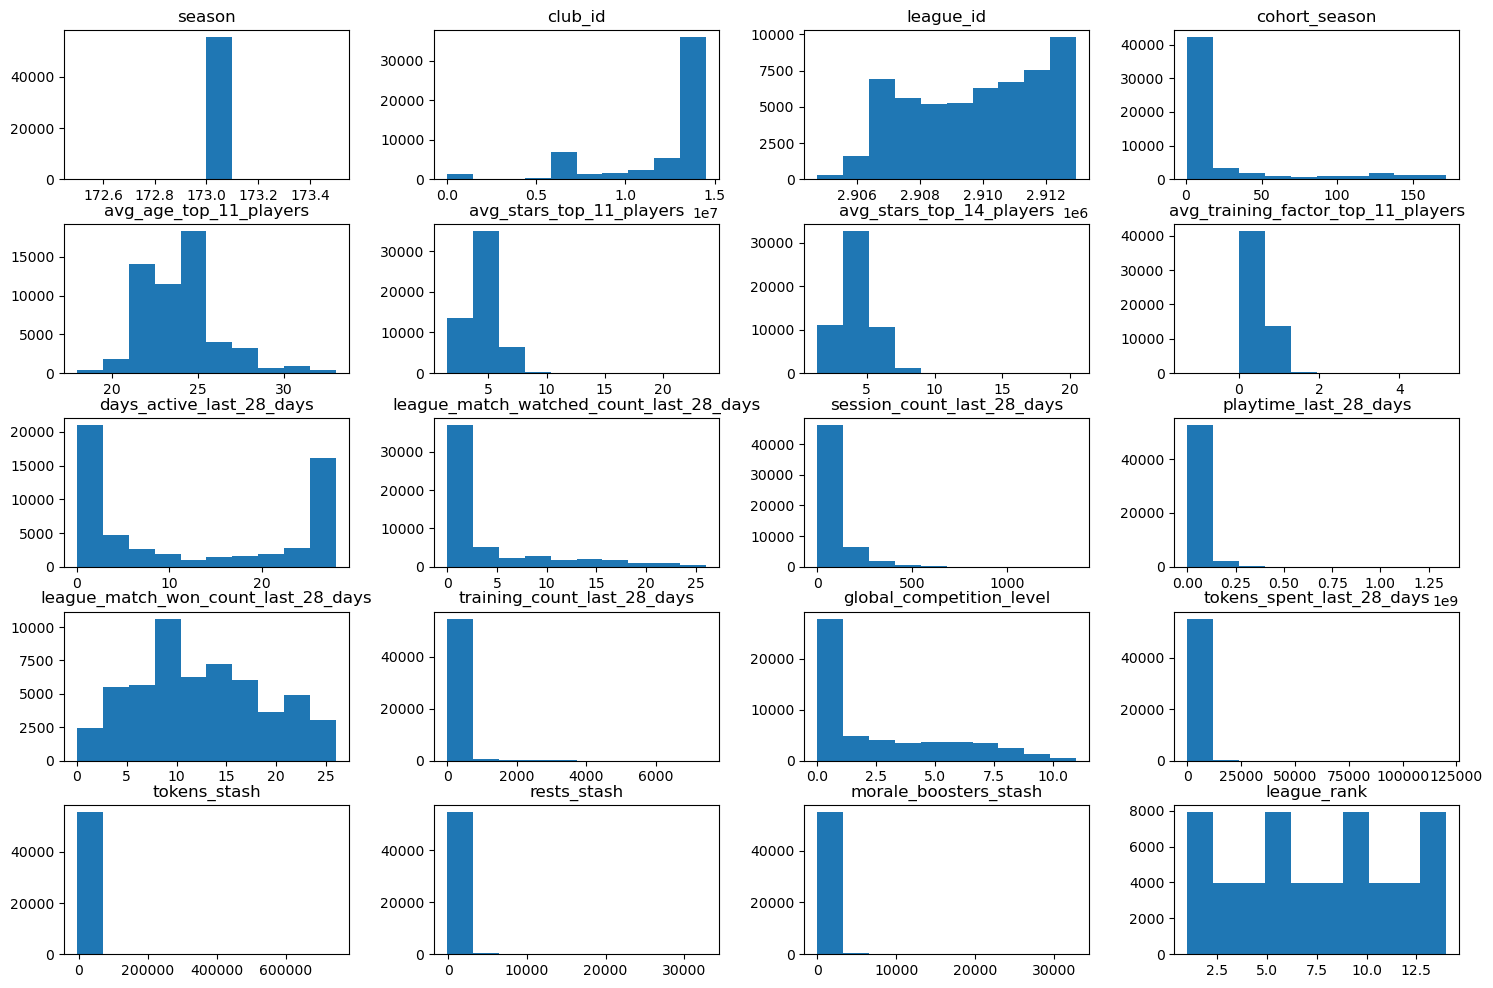

In [ ]:
data.hist(bins=10, figsize=(18, 12), grid=False)
plt.show()

### Visualizations of dataset

Here, will will use two popular libraries for starting point in our EDA, 'Sweetviz' and 'ydata profiling'.

In [ ]:
my_report = sv.analyze(data)
my_report.show_html('nordeus_report_sweetviz.html')

                                             |          | [  0%]   00:00 -> (? left)

Report nordeus_report_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



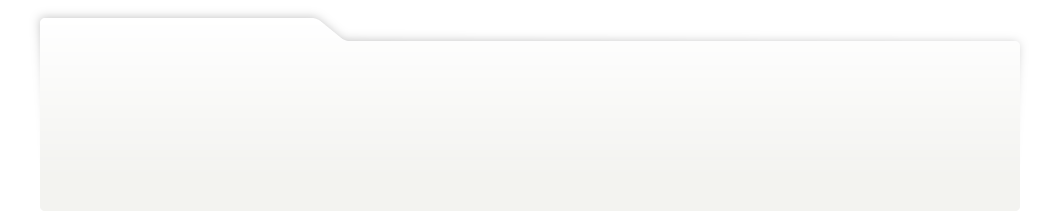
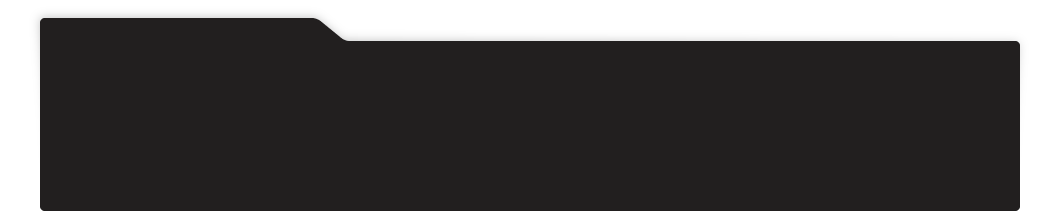
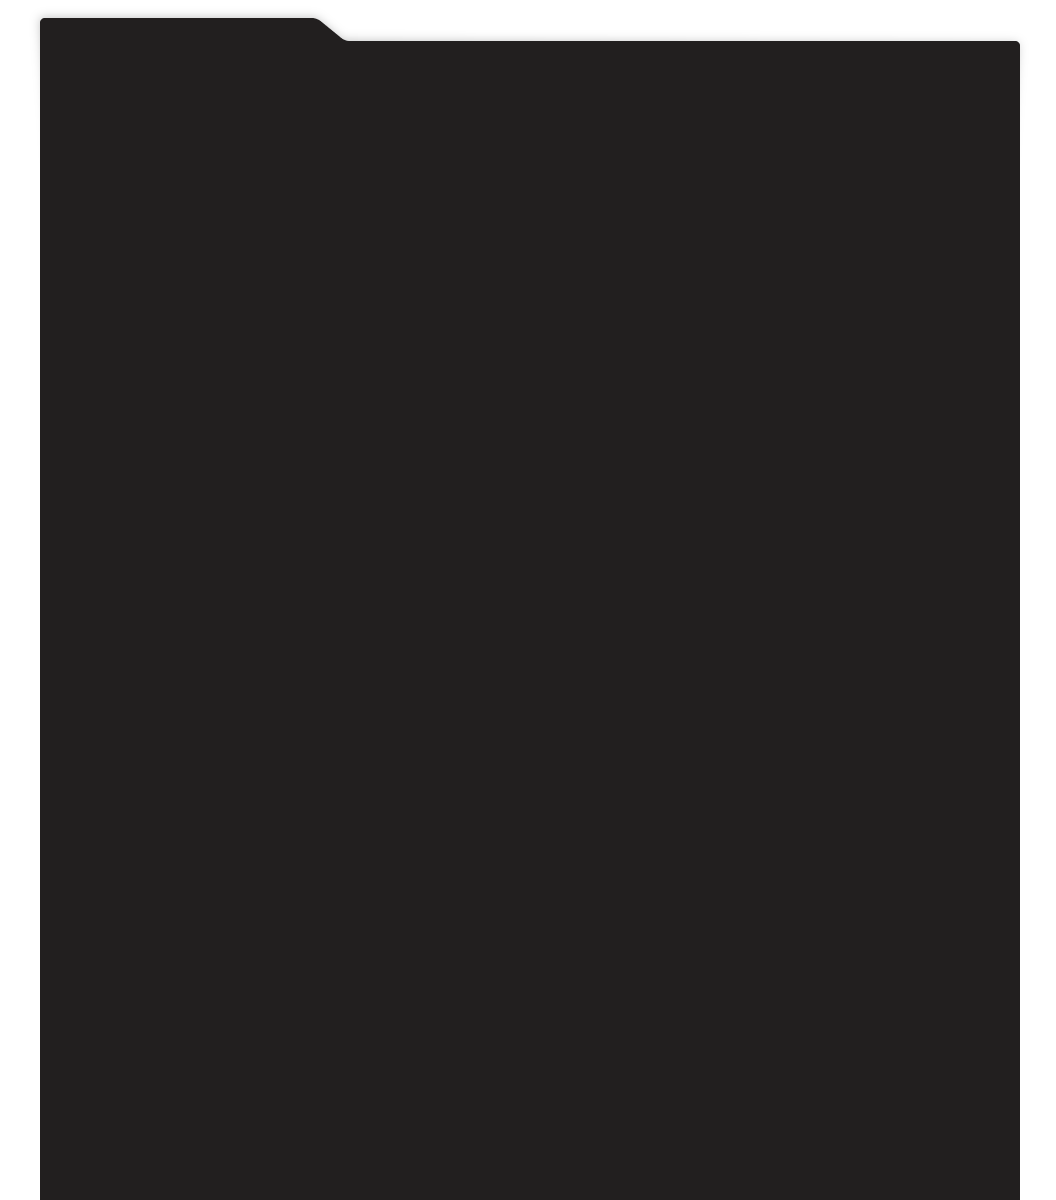
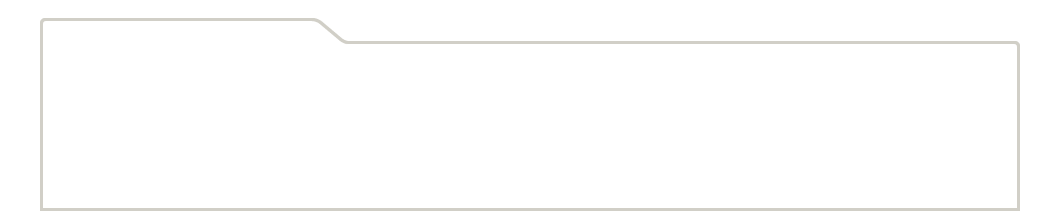
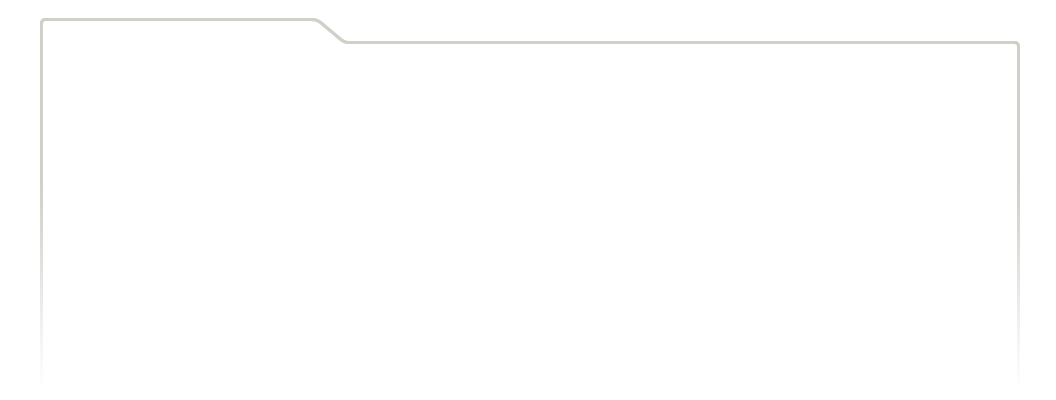
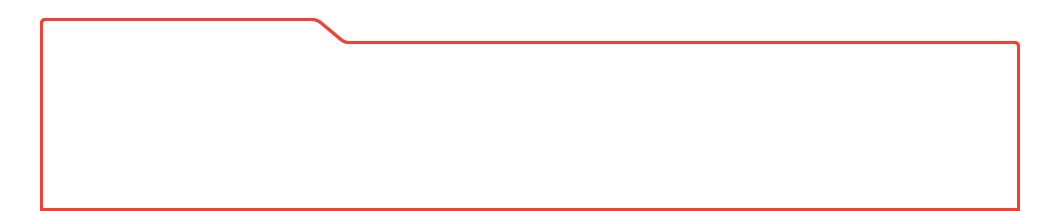
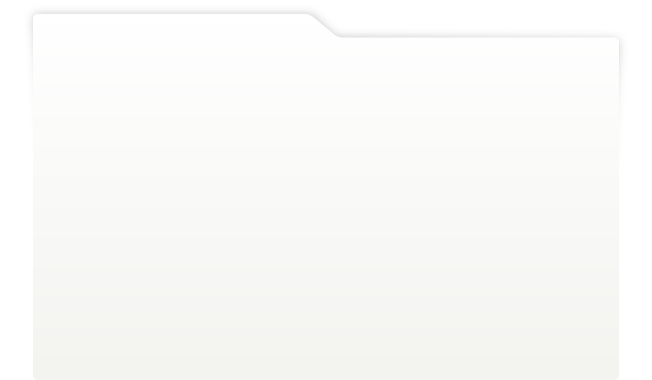
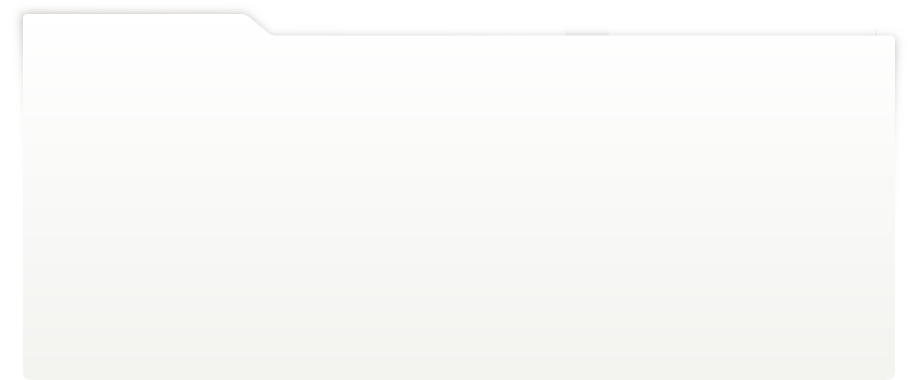
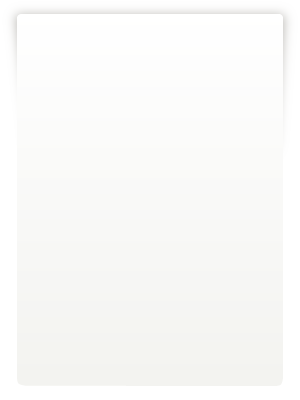
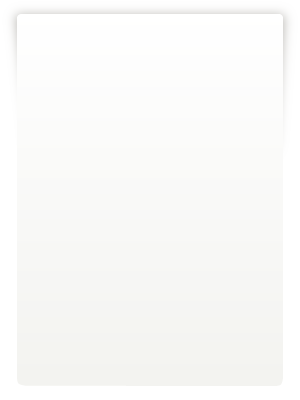
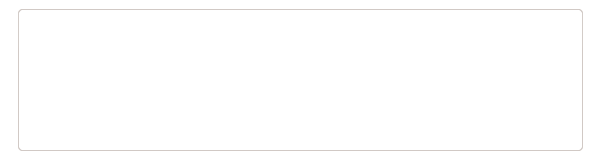
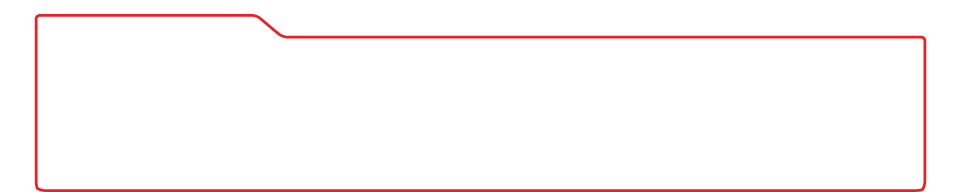
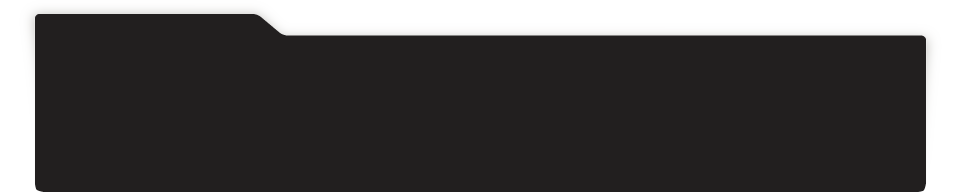
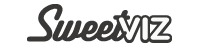
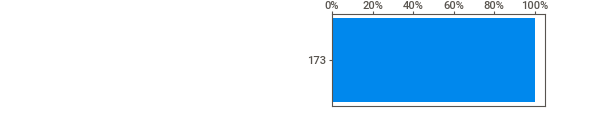
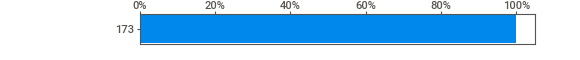
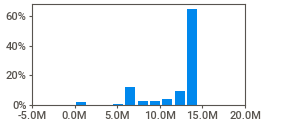
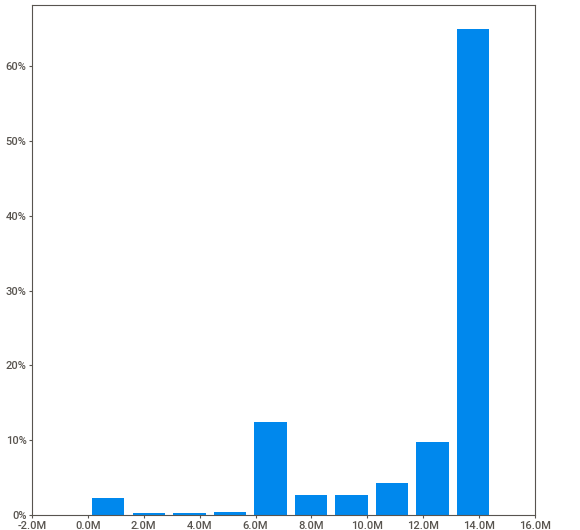
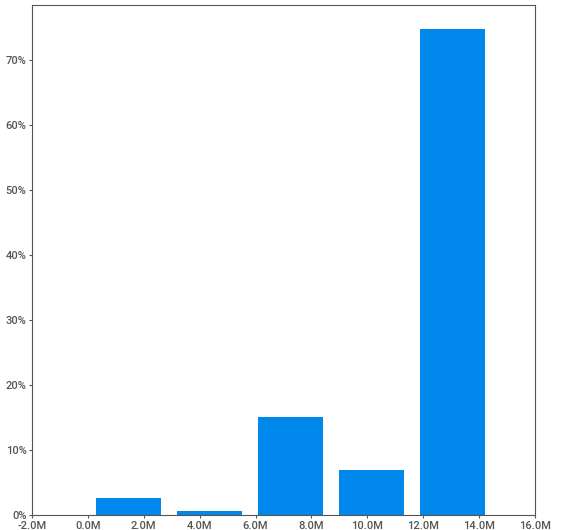
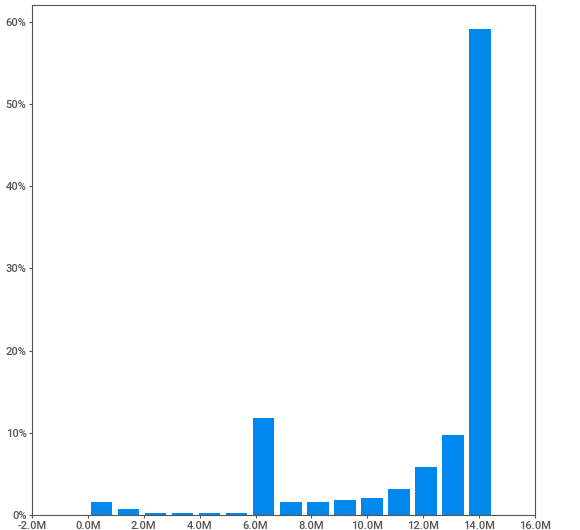
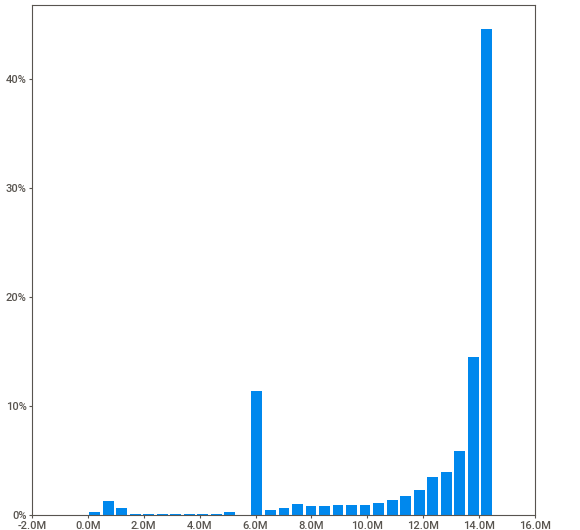
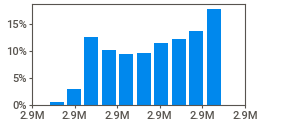
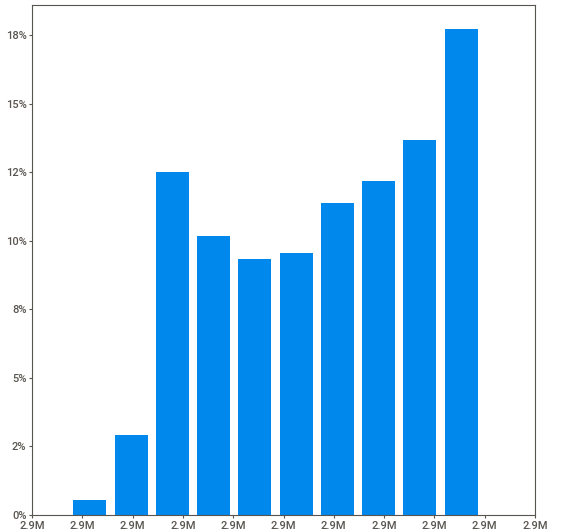
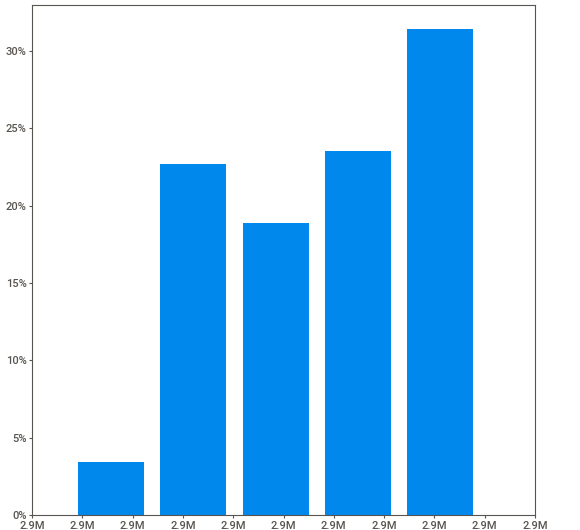
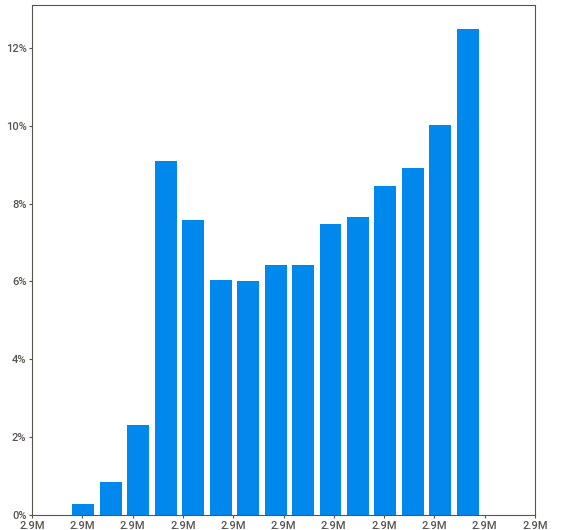
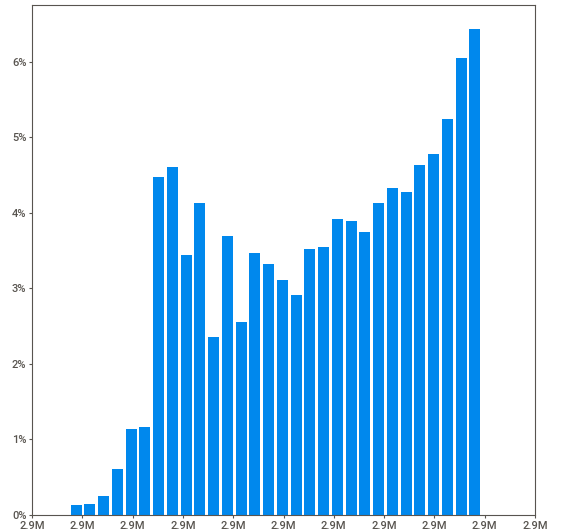
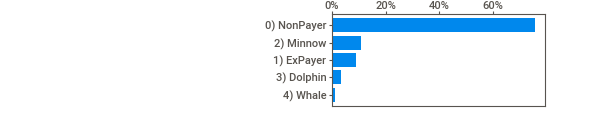
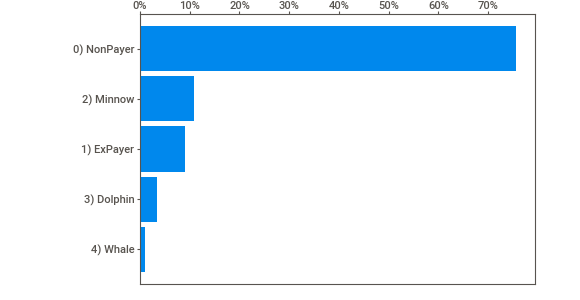
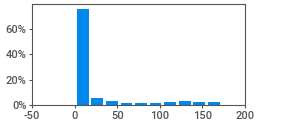
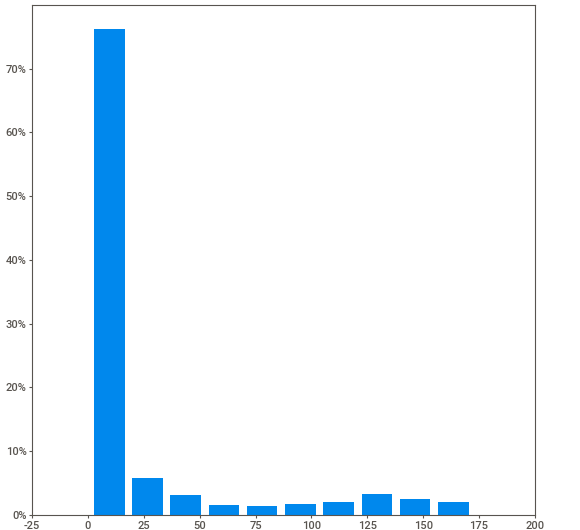
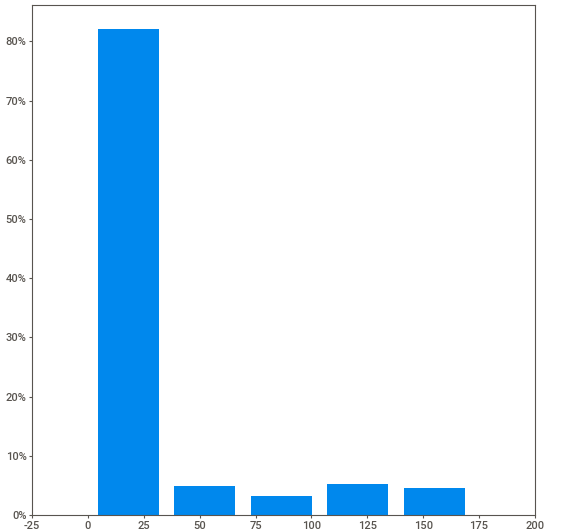
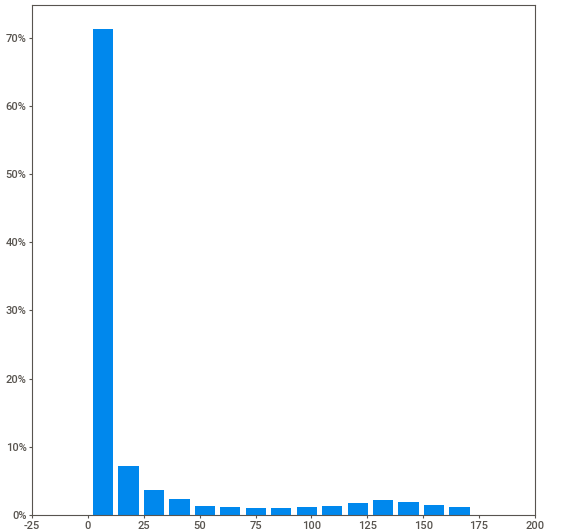
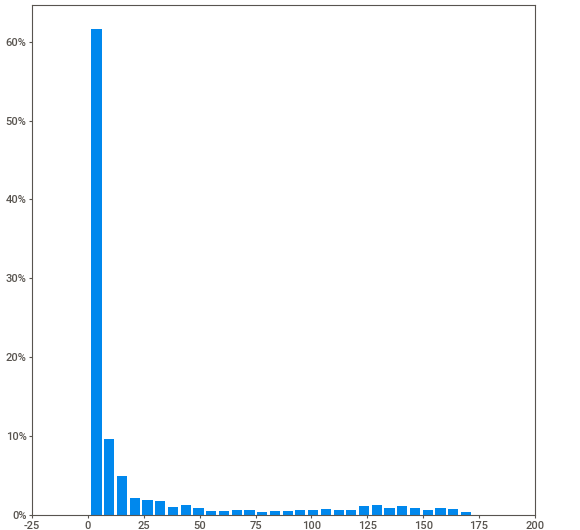
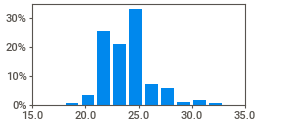
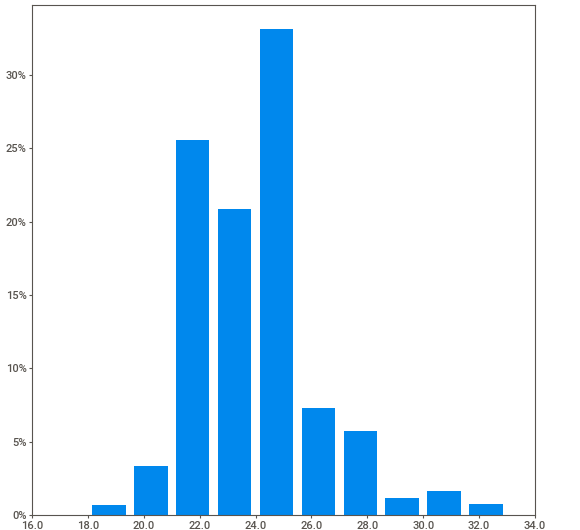
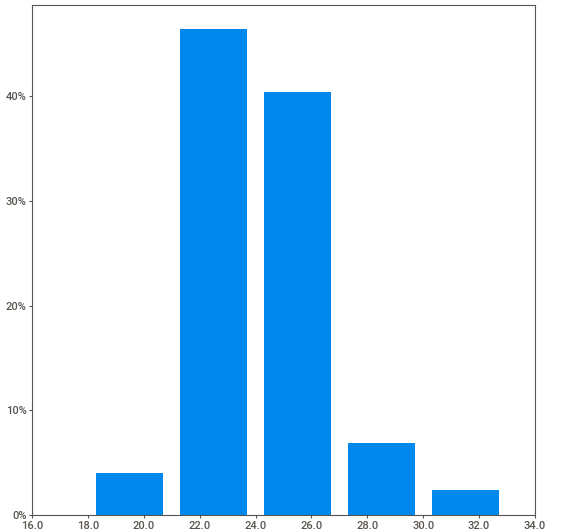
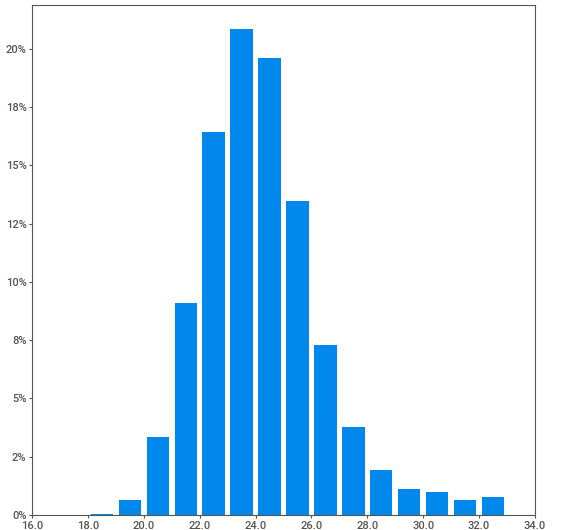
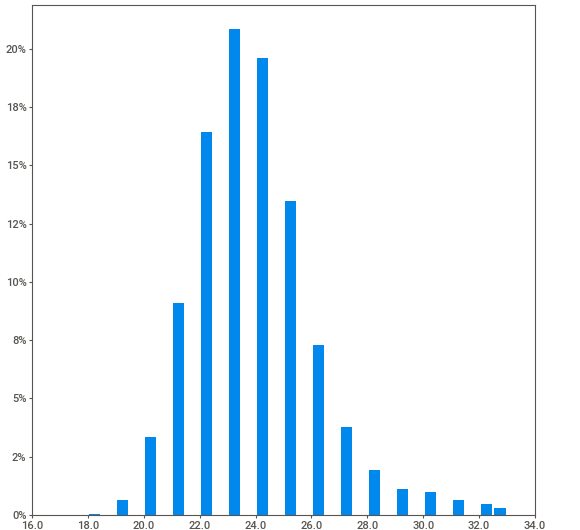
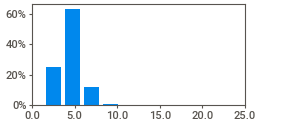
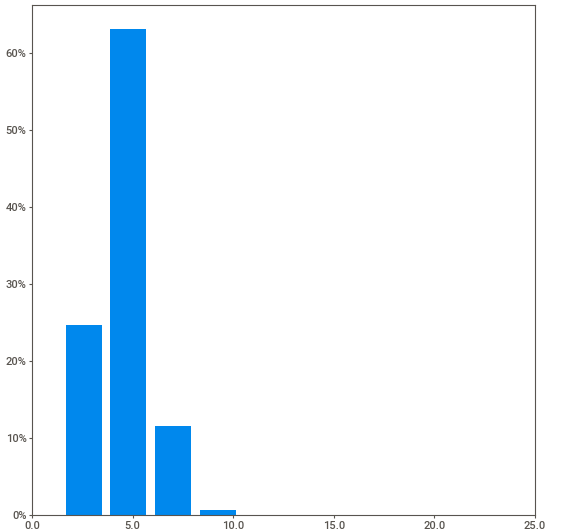
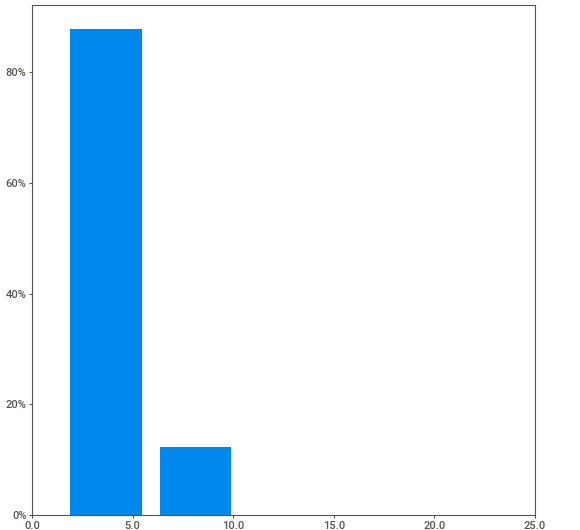
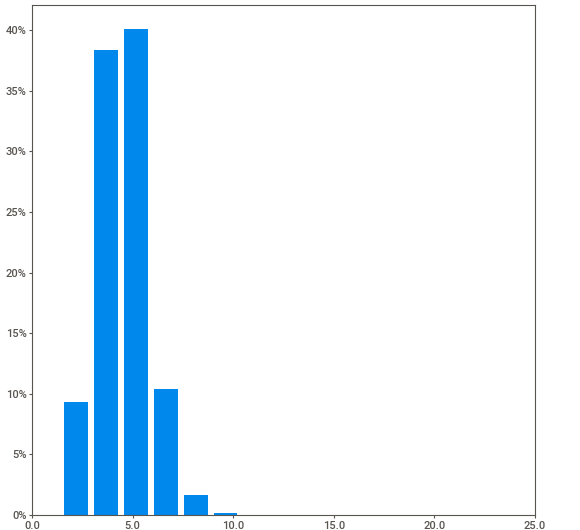
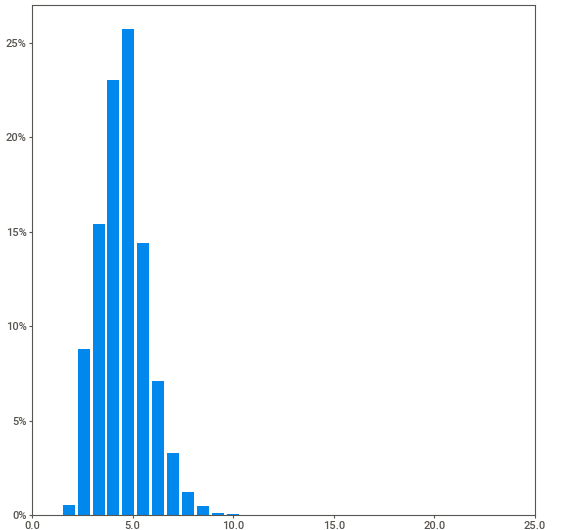
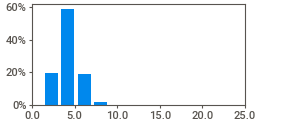
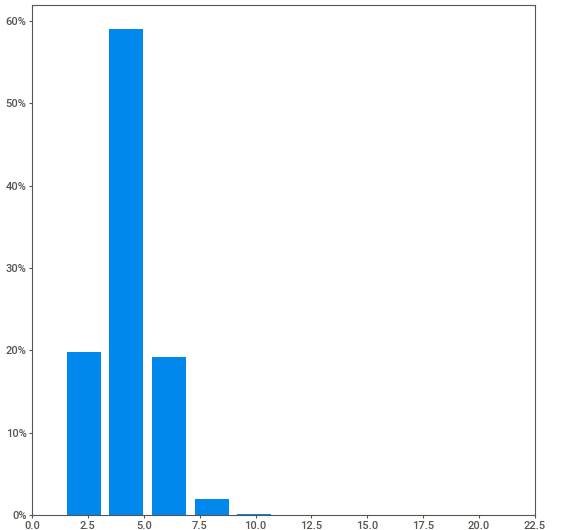
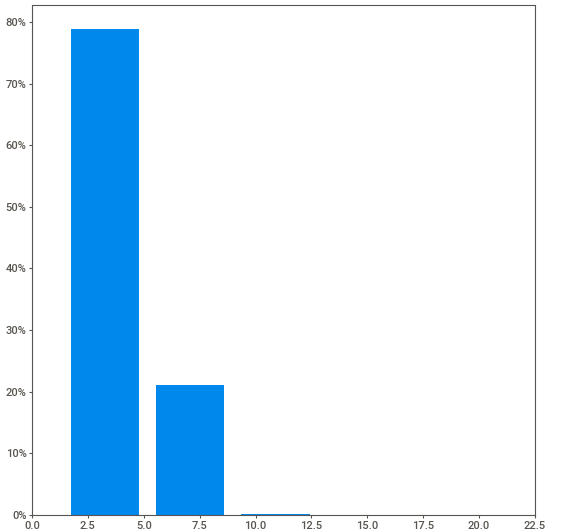
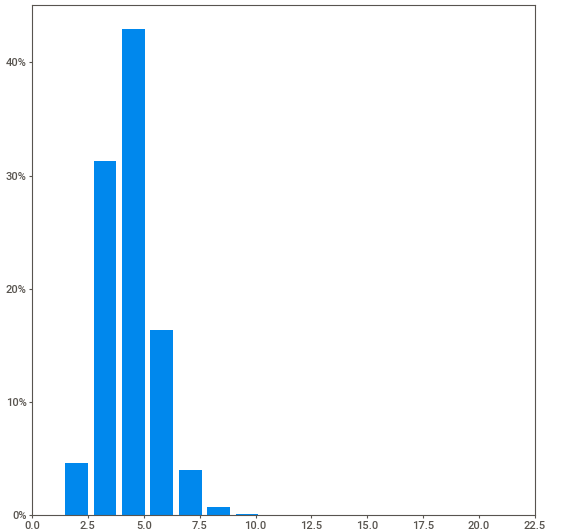
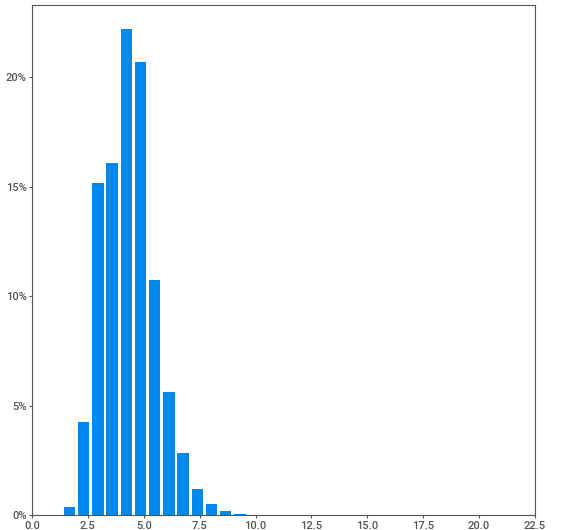
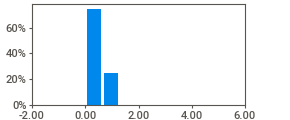
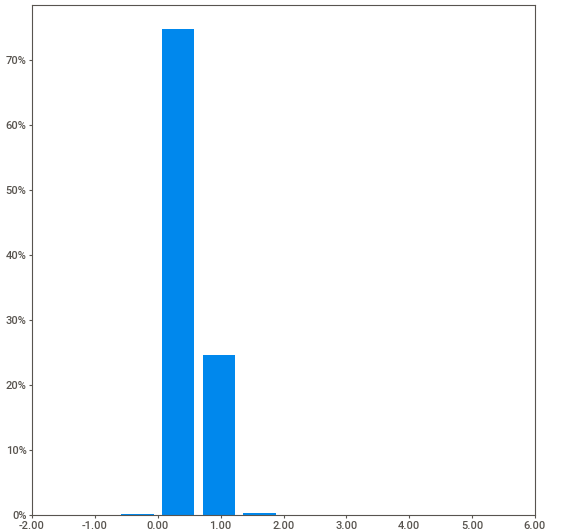
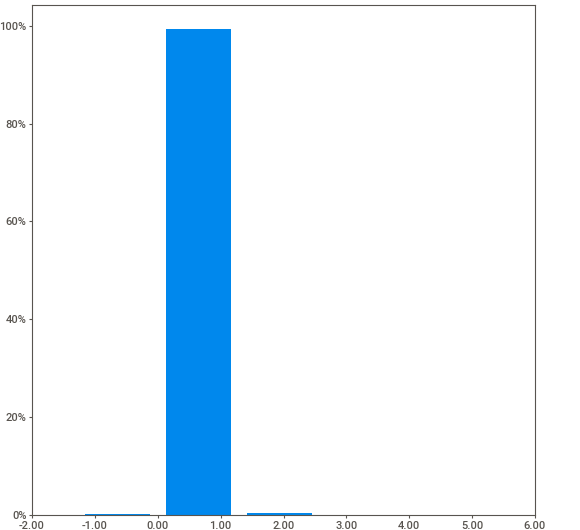
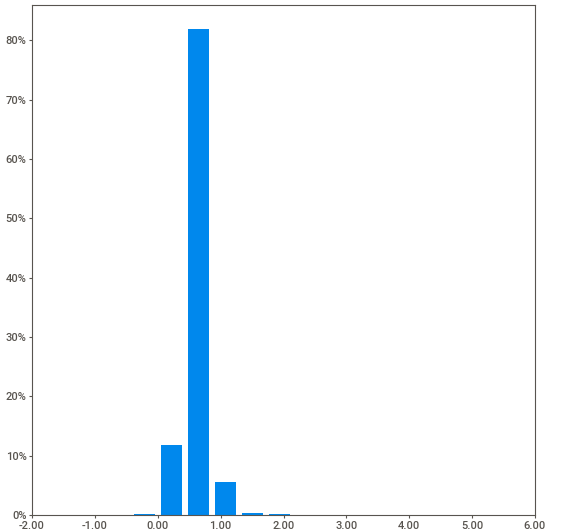
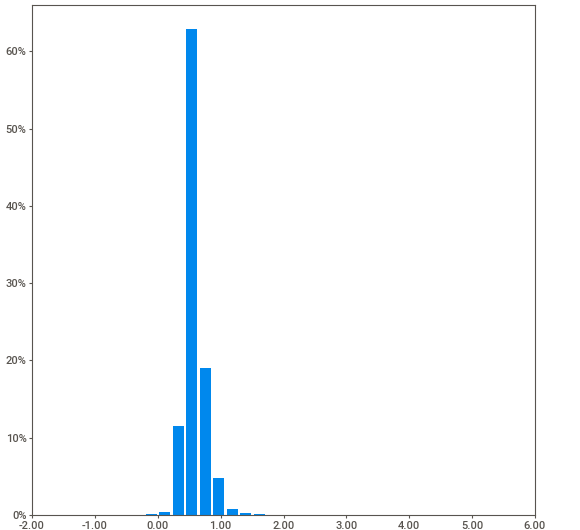
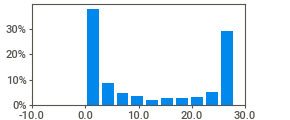
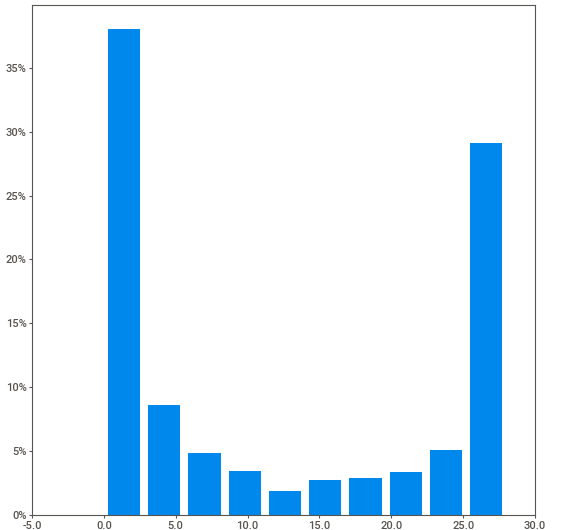
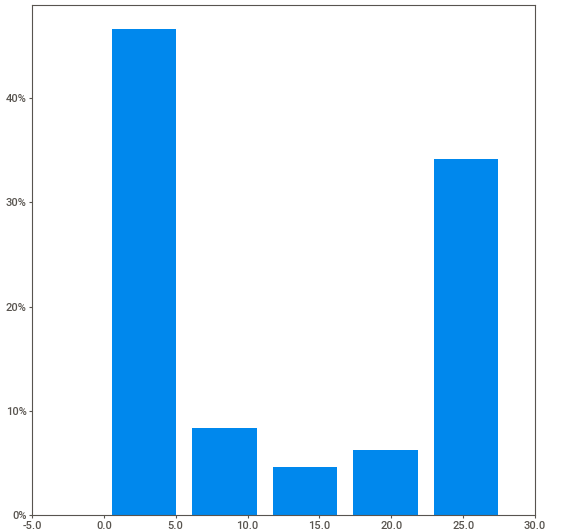
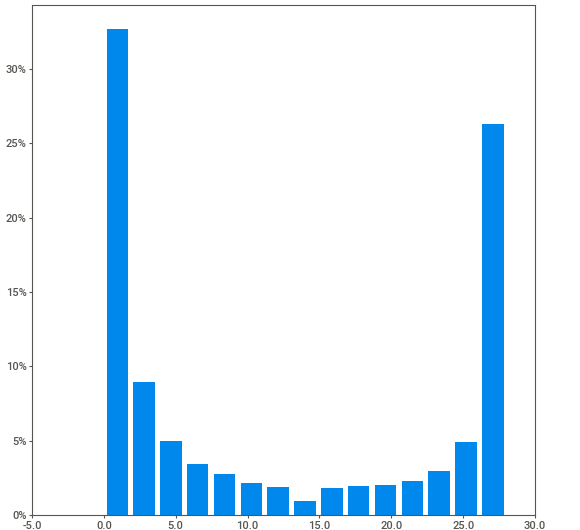
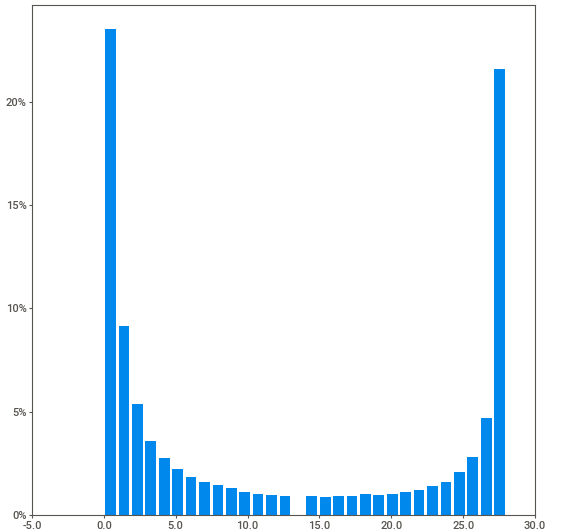
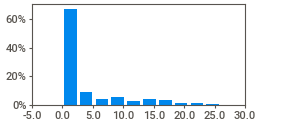
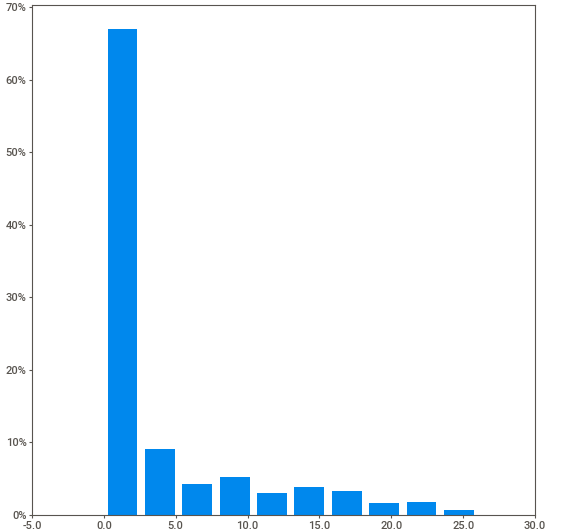
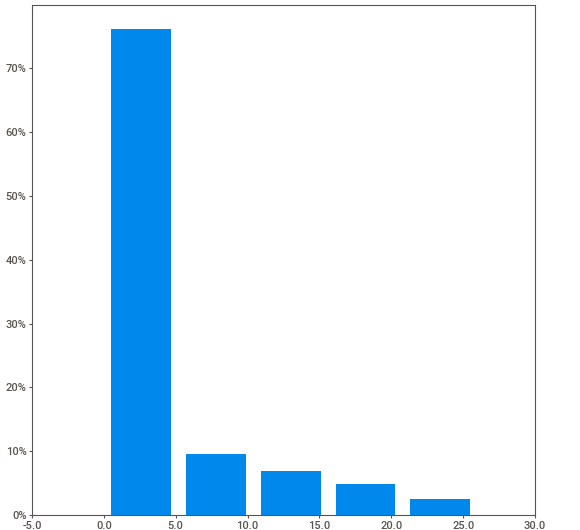
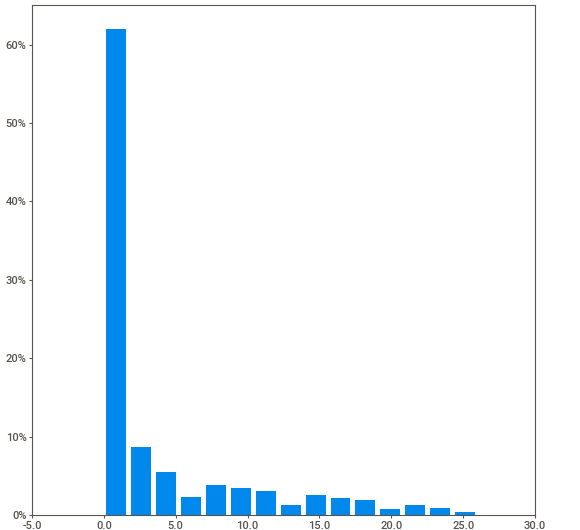
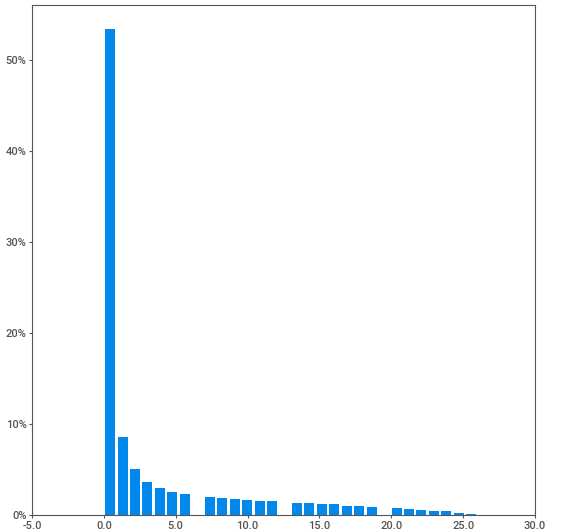
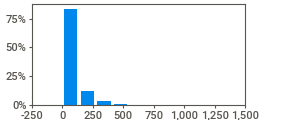
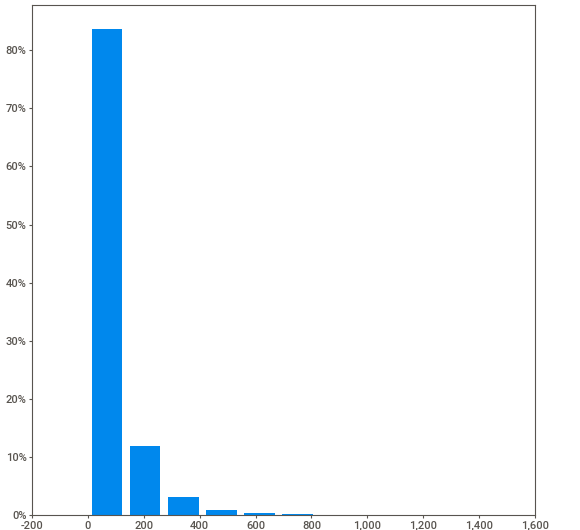
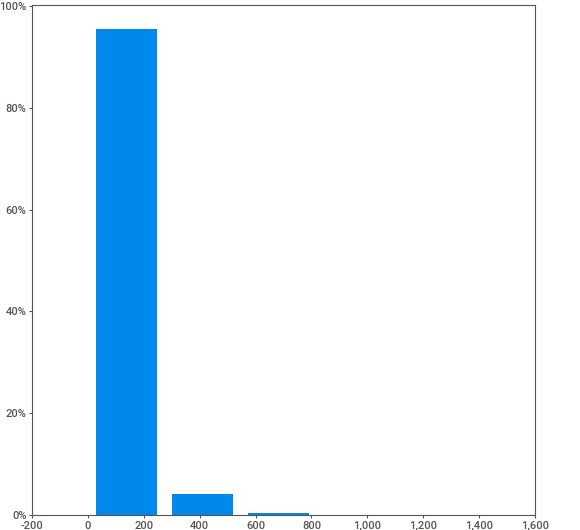
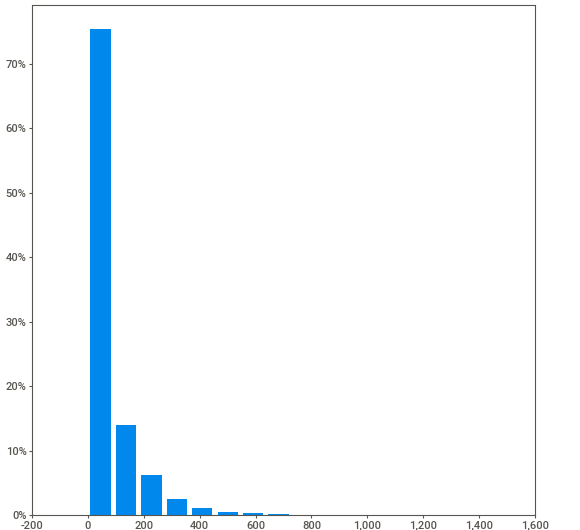
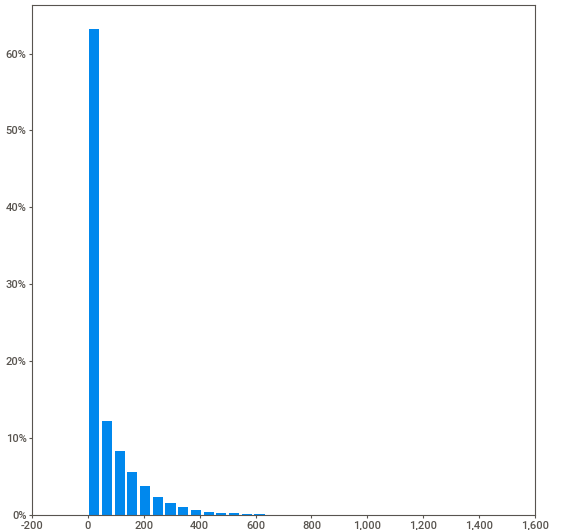
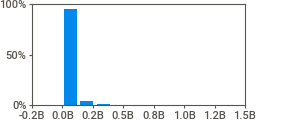
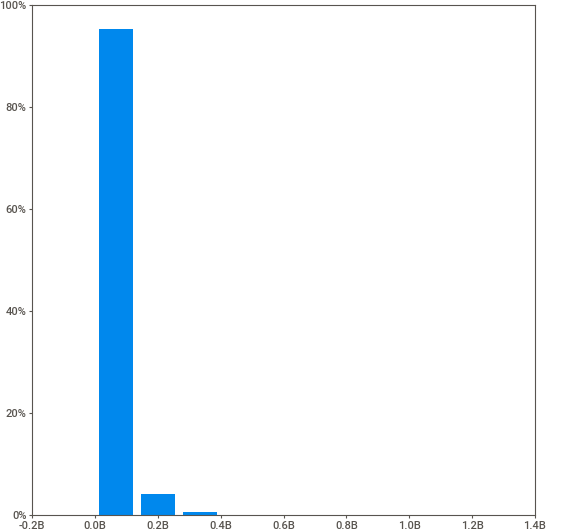
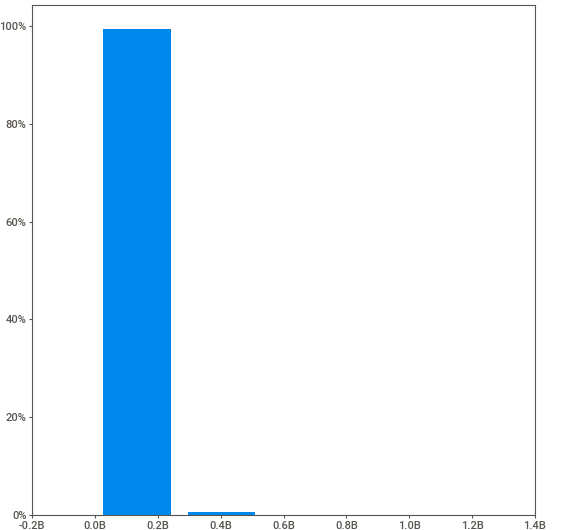
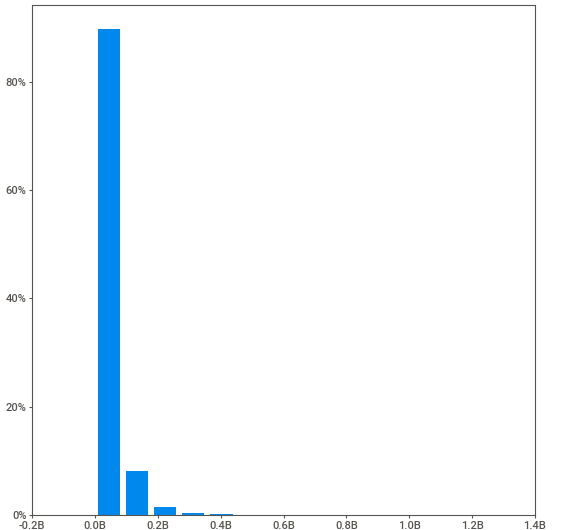
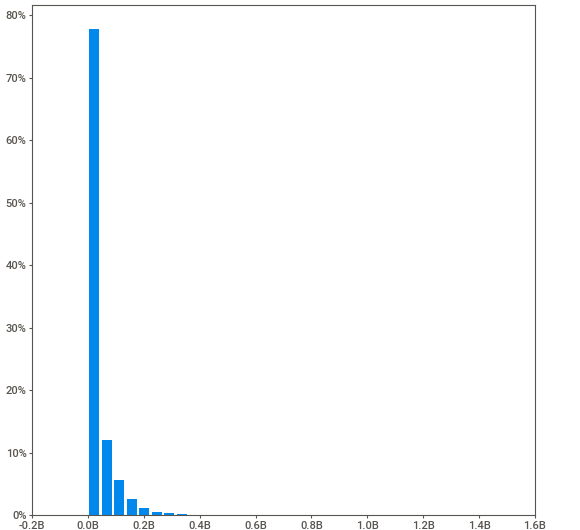
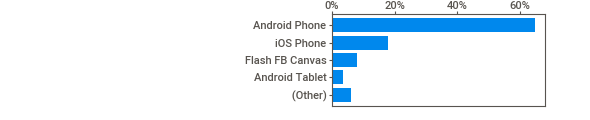
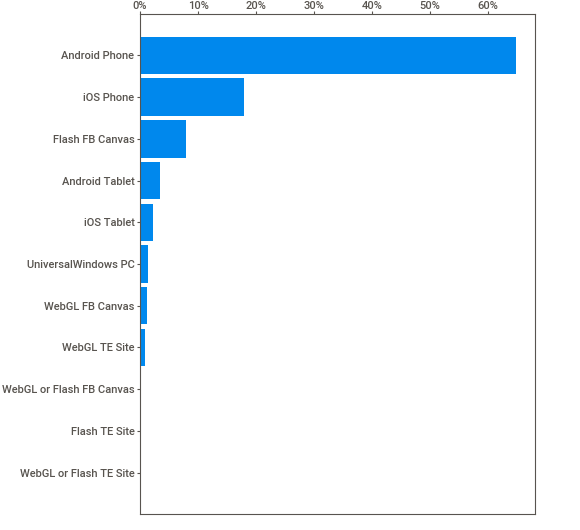
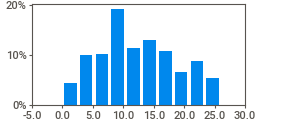
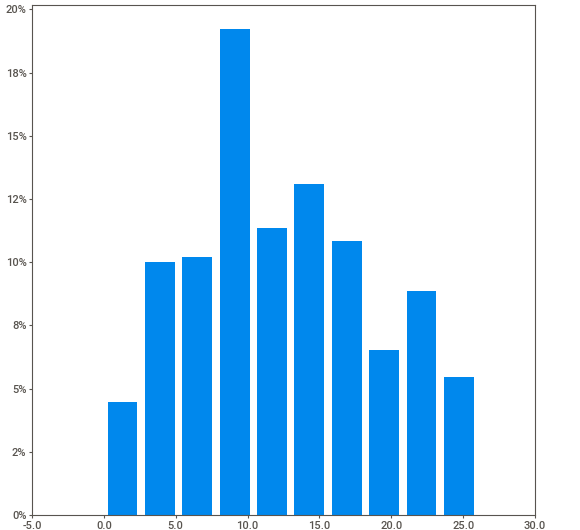
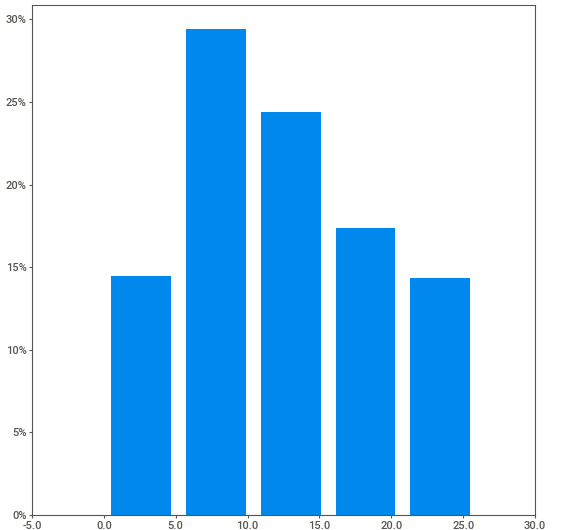
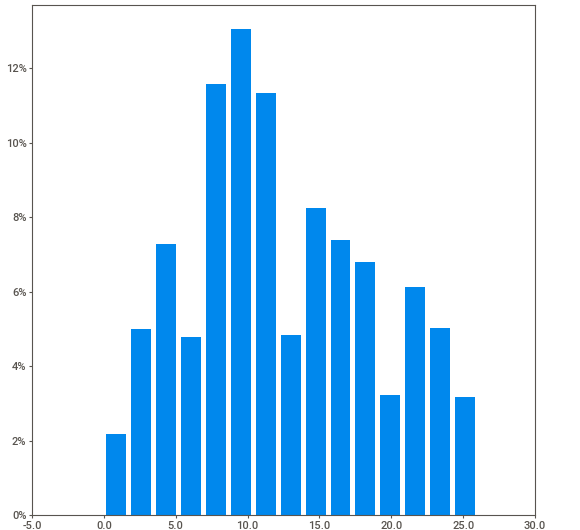
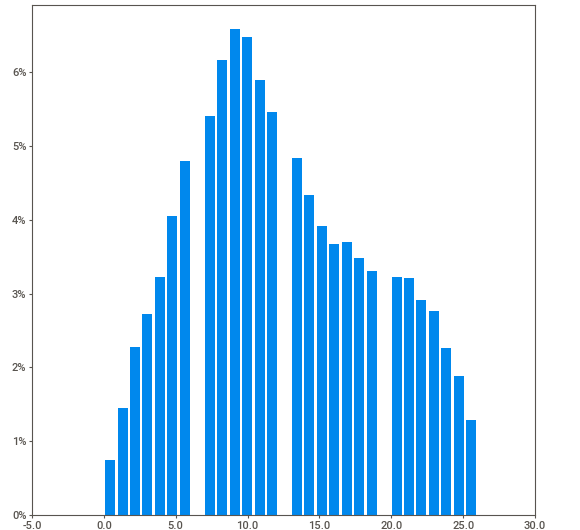
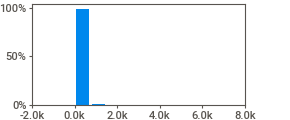
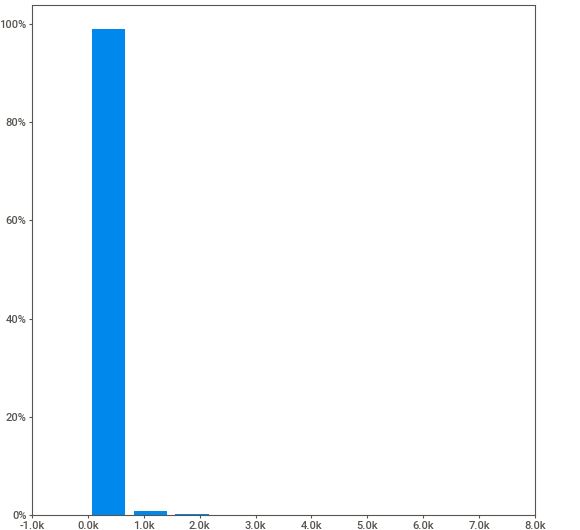
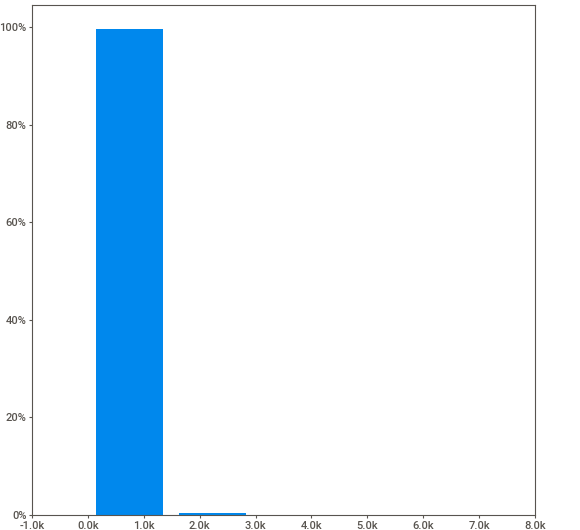
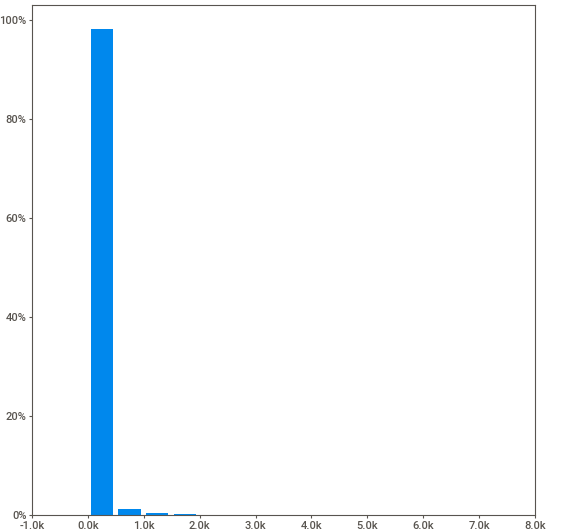
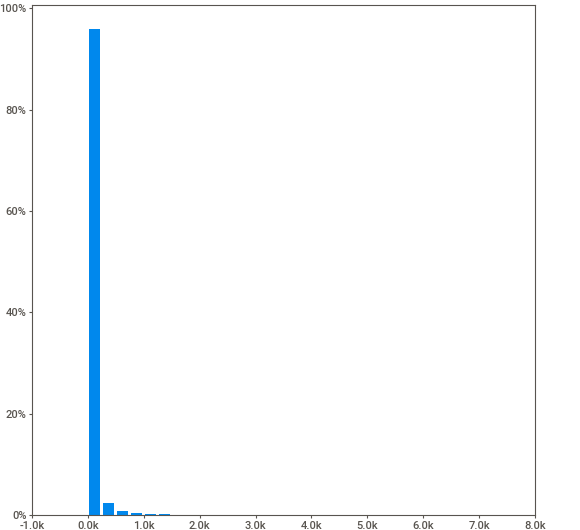
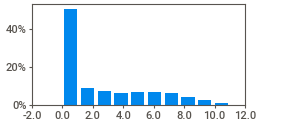
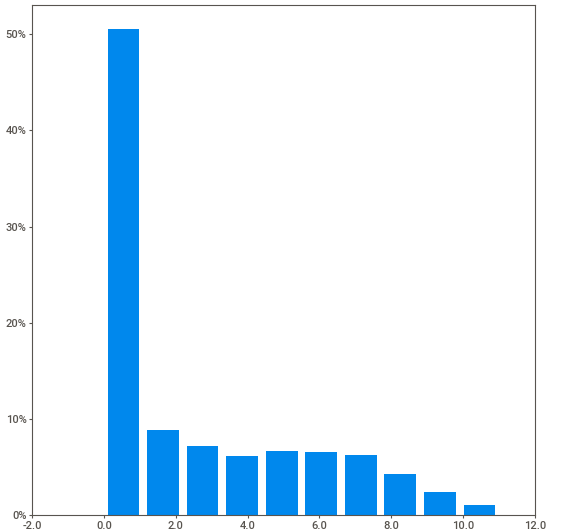
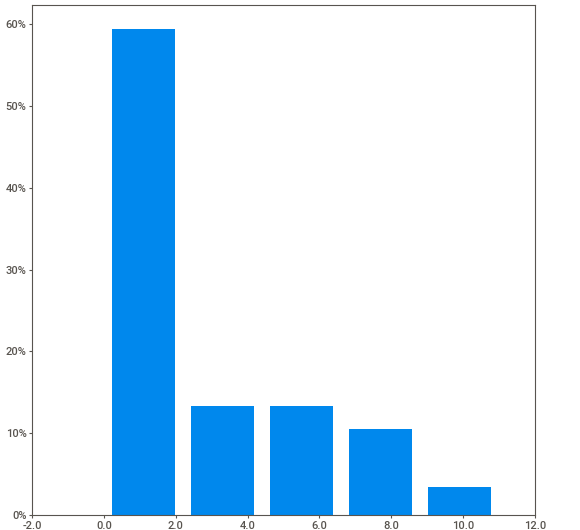
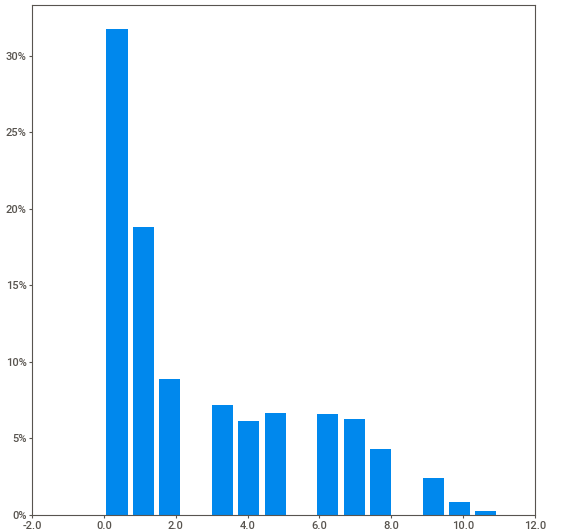
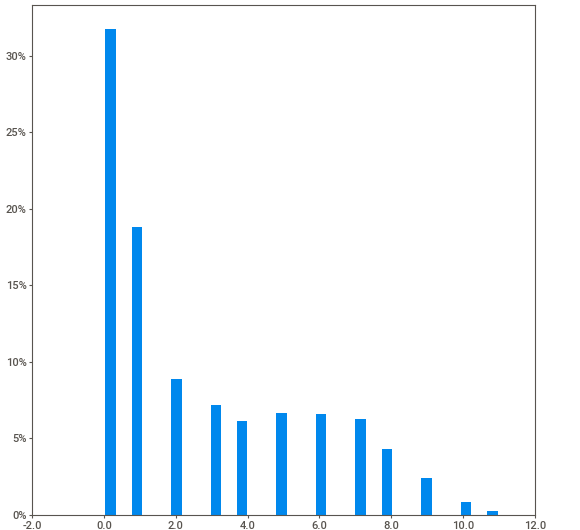
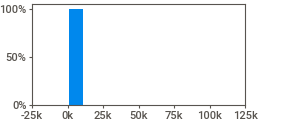
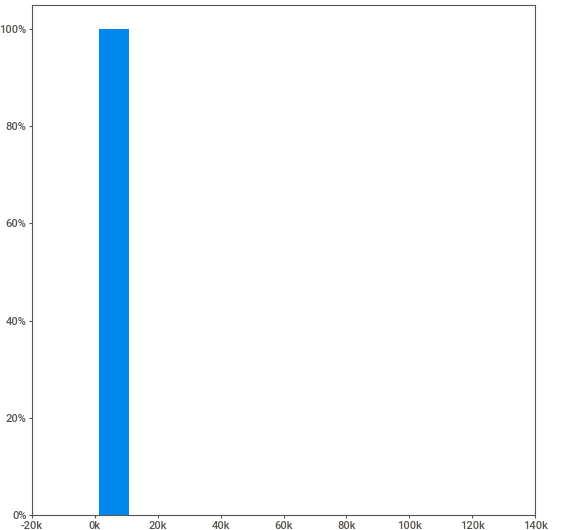
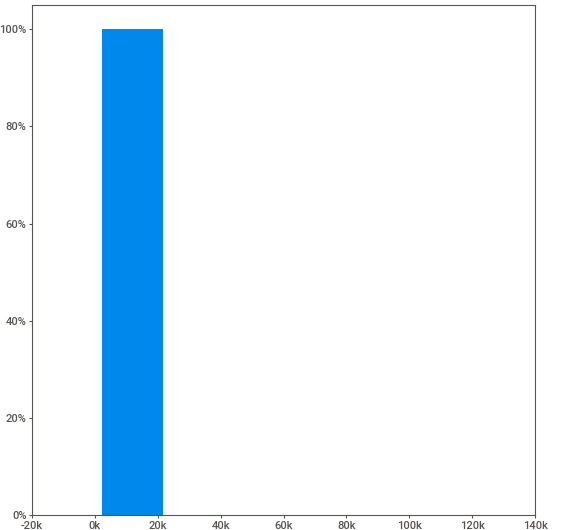
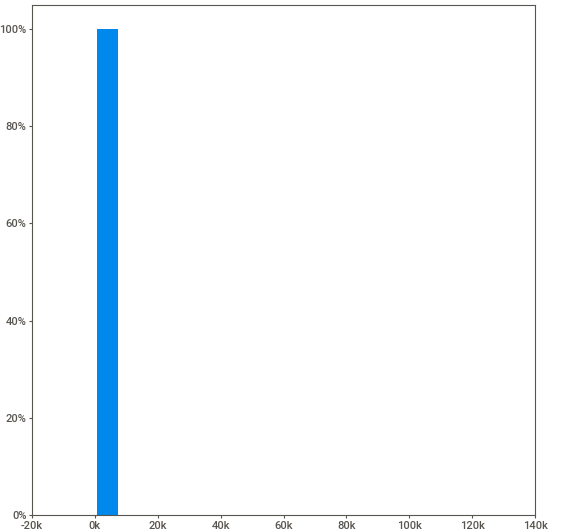
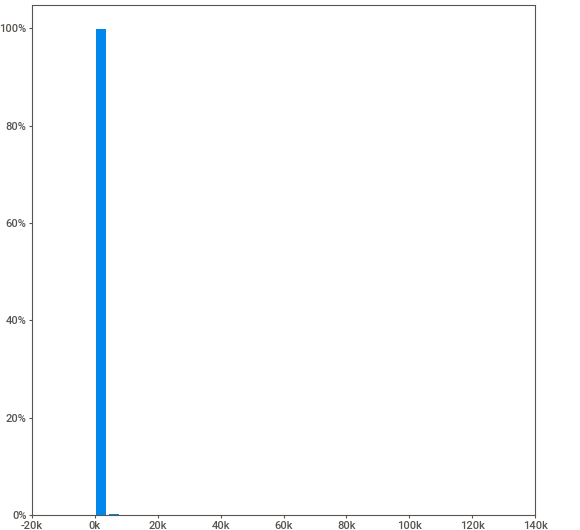
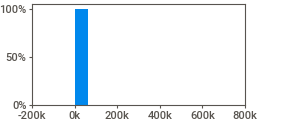
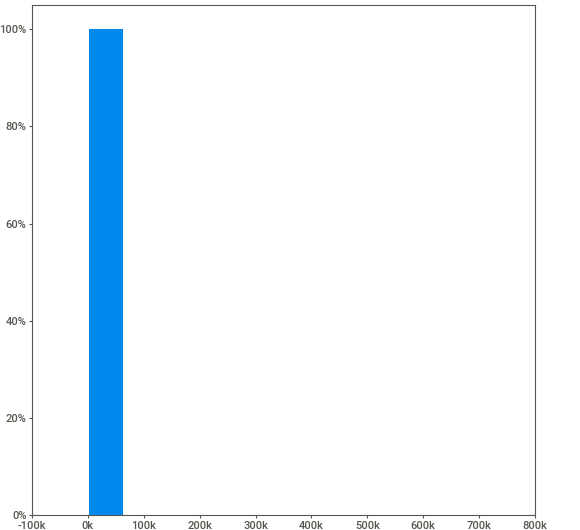
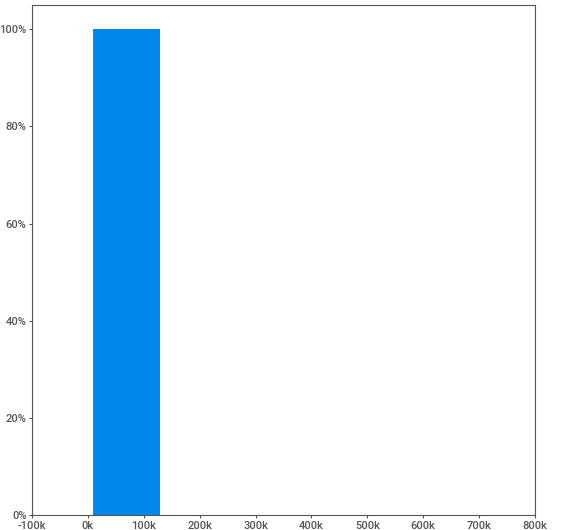
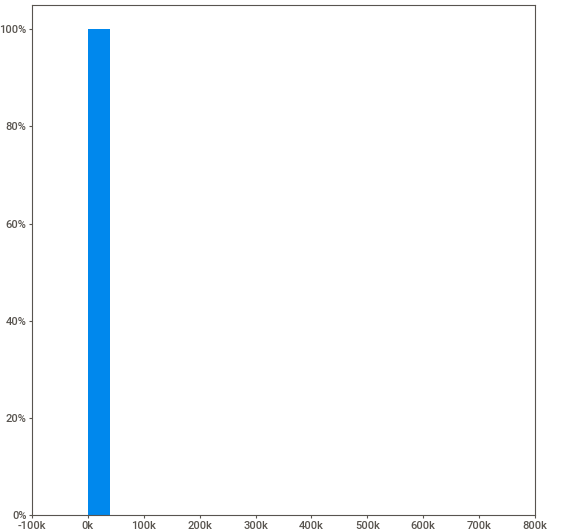
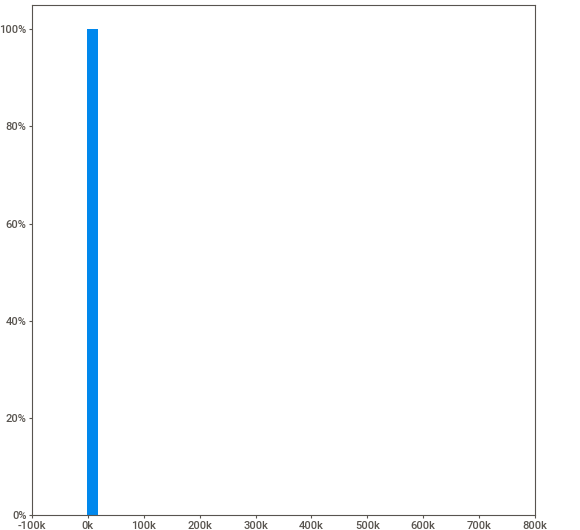
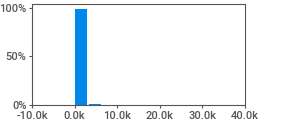
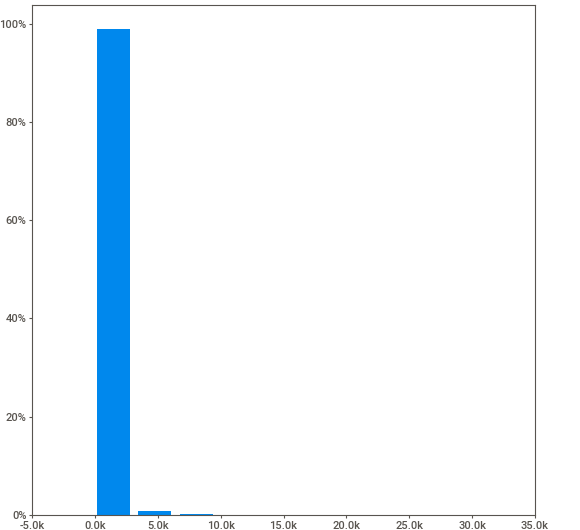
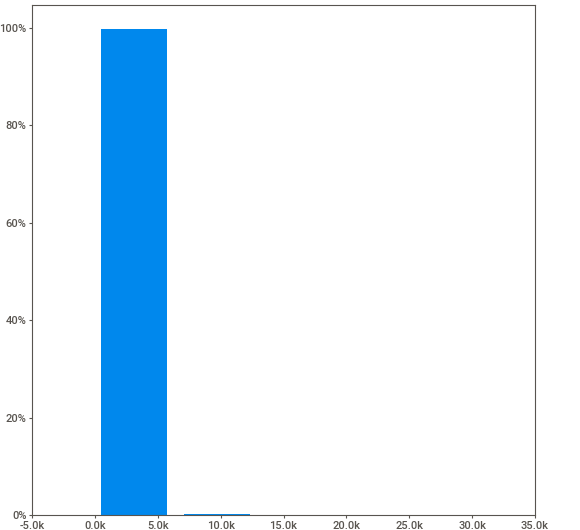
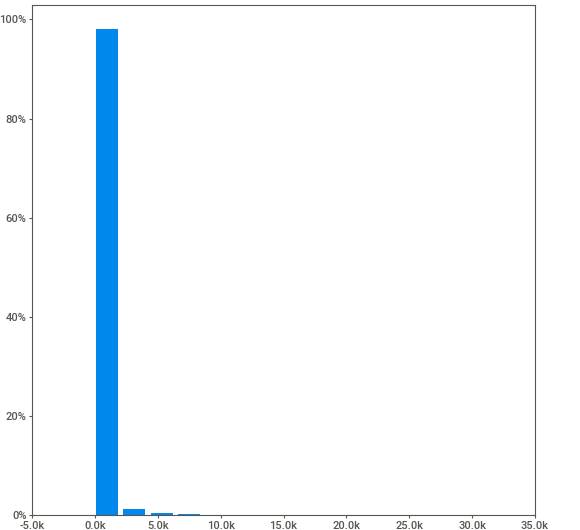
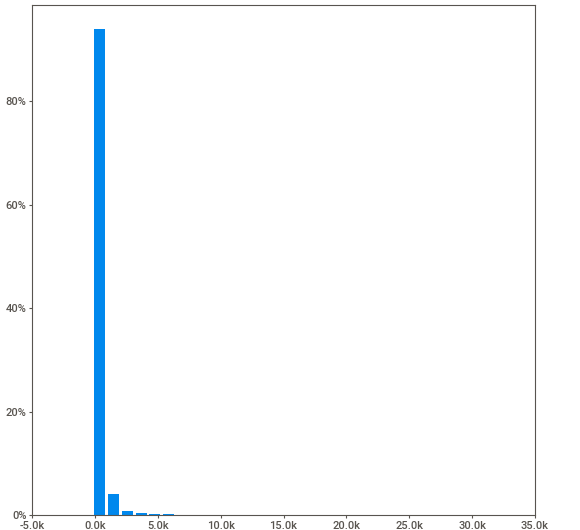
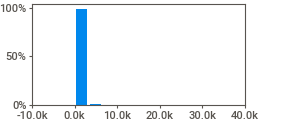
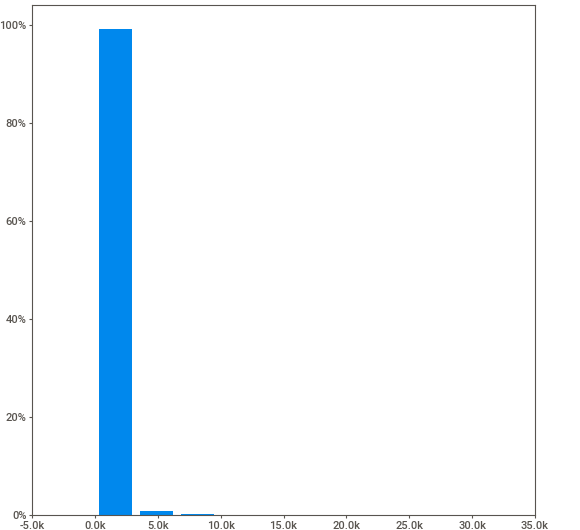
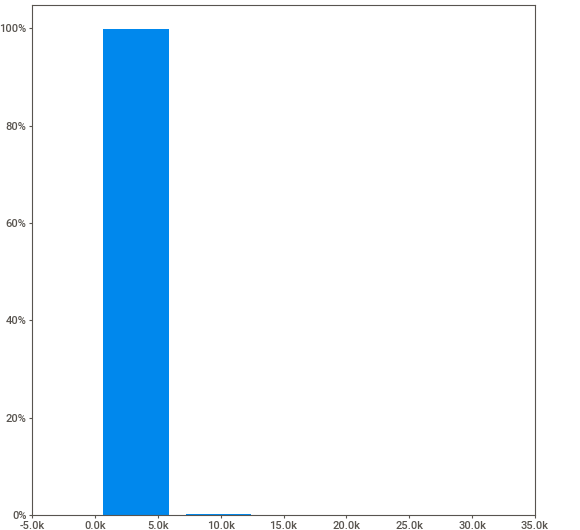
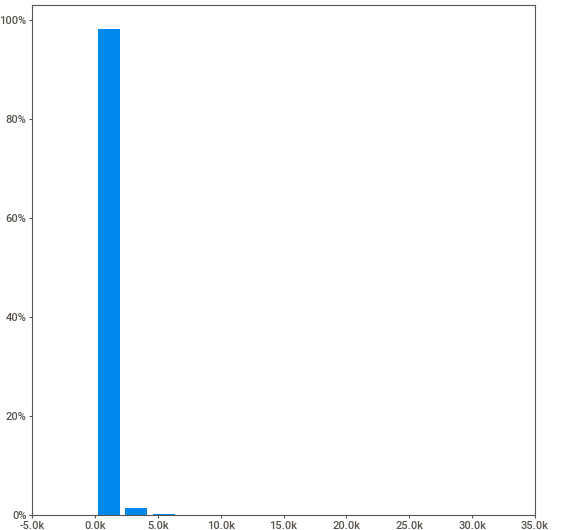
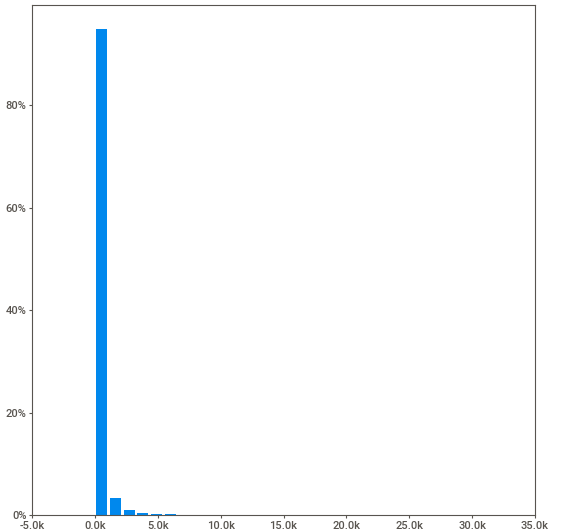
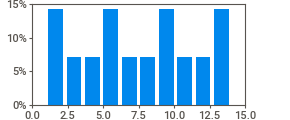
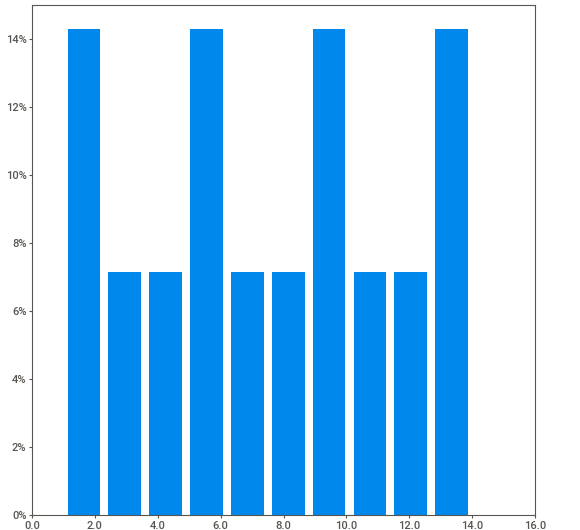
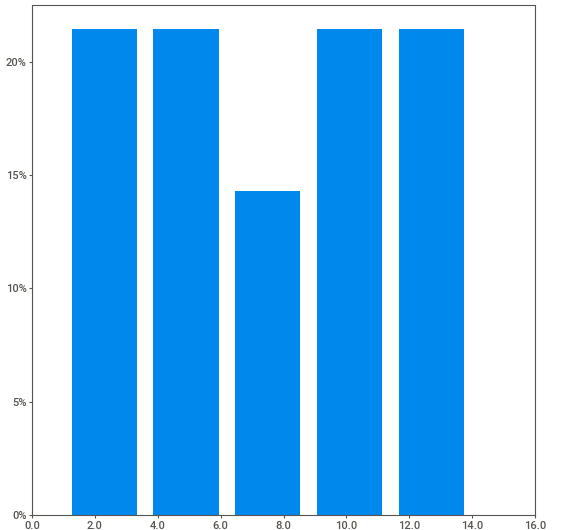
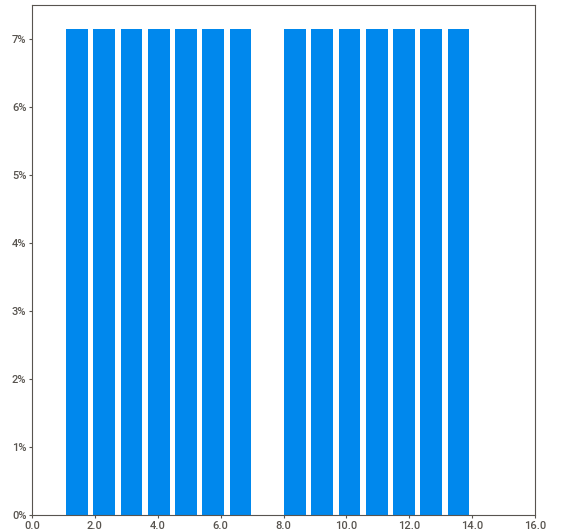
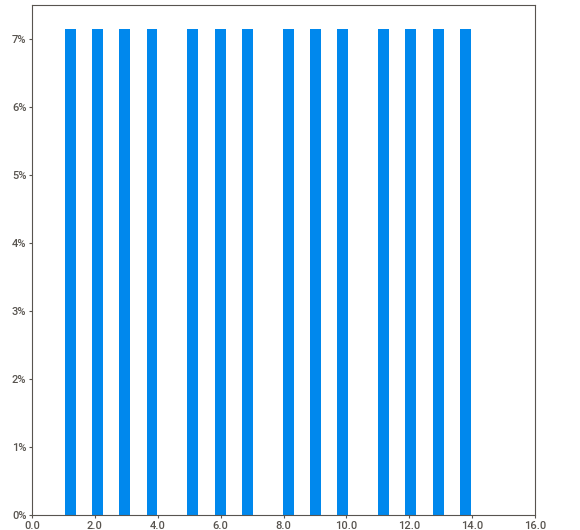
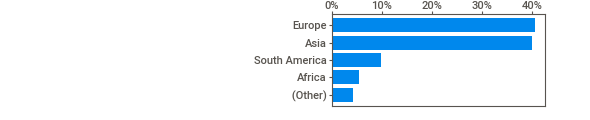
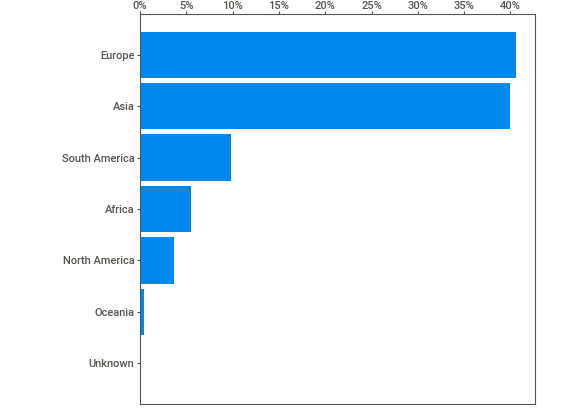
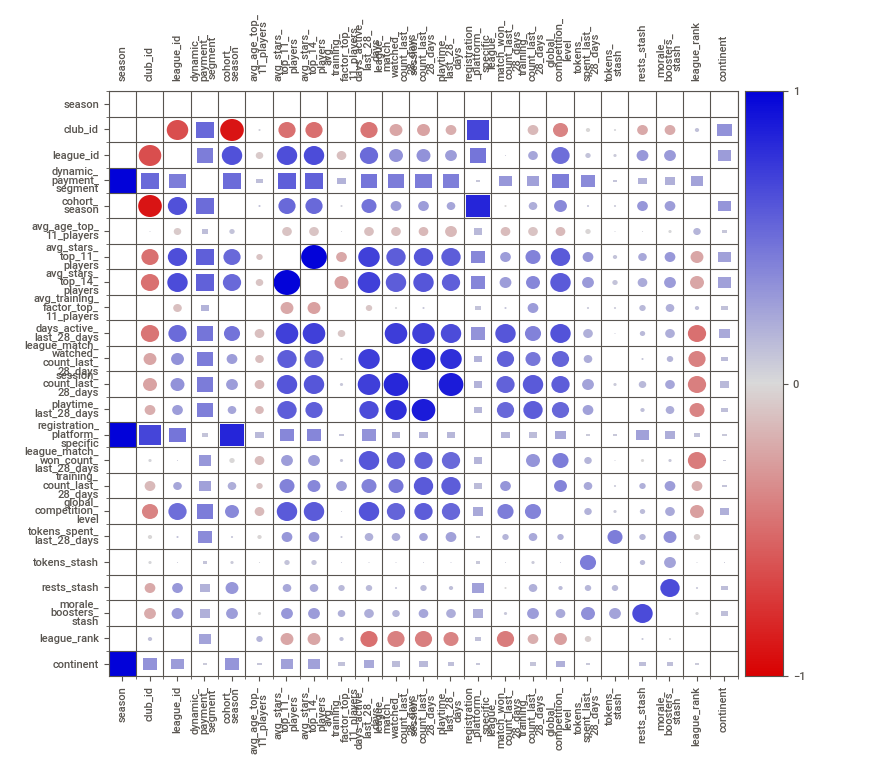
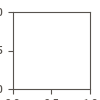

In [ ]:
my_report.show_notebook(  w=None,
                h=None,
                scale=None,
                layout='widescreen',
                filepath=None)

In [ ]:
profile = ProfileReport(data, title="Profiling Report")
profile.to_file("Nordeus_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# List of numerical columns for visualization
numerical_cols = ['club_id', 'league_id', 'cohort_season', 'avg_age_top_11_players',
                  'avg_stars_top_11_players', 'avg_stars_top_14_players', 'avg_training_factor_top_11_players',
                  'days_active_last_28_days', 'league_match_watched_count_last_28_days', 'session_count_last_28_days',
                  'playtime_last_28_days', 'league_match_won_count_last_28_days', 'training_count_last_28_days',
                  'global_competition_level', 'tokens_spent_last_28_days', 'tokens_stash', 'rests_stash', 'morale_boosters_stash'
]

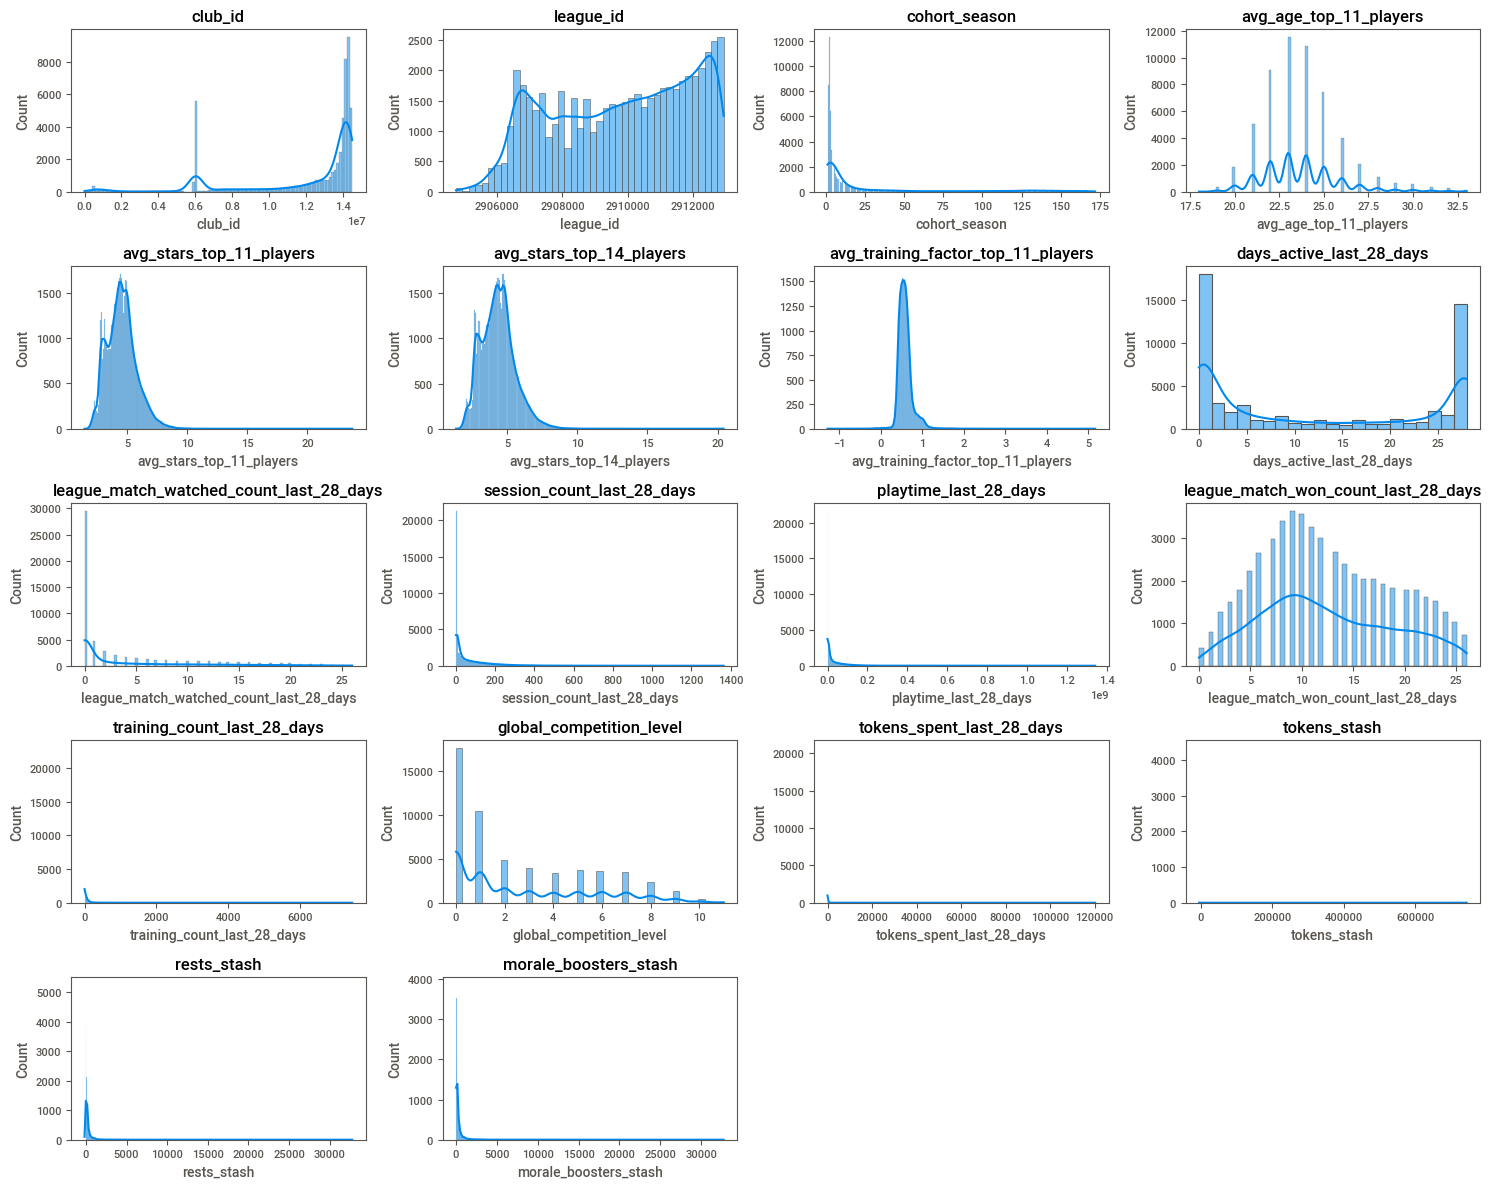

In [ ]:
# Create subplots for histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

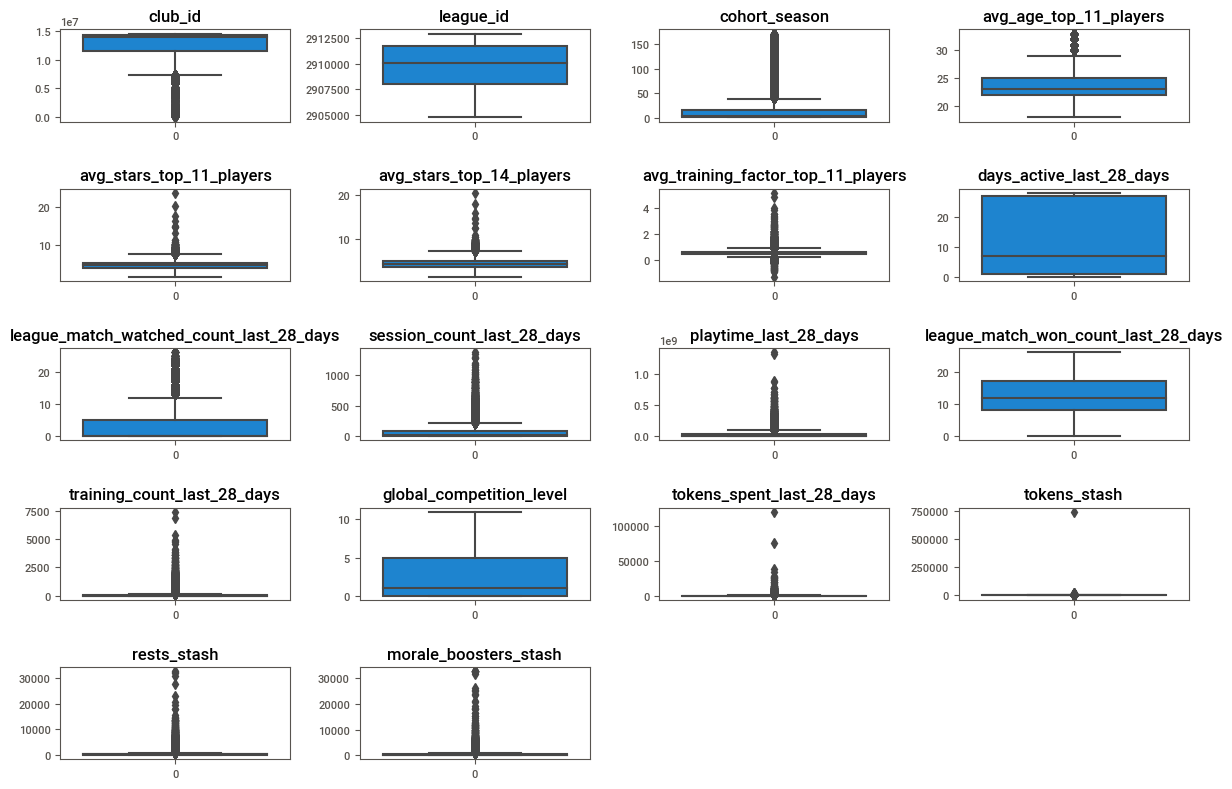

In [ ]:
# Box plots to visualize the distribution of each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Detection of Outliers

In [ ]:
# Calculate the IQR for each numerical column
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = ((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)
outliers.value_counts()

False    30698
True     24616
Name: count, dtype: int64

In [ ]:
# Remove outliers
cleaned_data = data[~outliers]

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30698 entries, 3 to 55313
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   season                                   30698 non-null  int64  
 1   club_id                                  30698 non-null  int64  
 2   league_id                                30698 non-null  int64  
 3   dynamic_payment_segment                  30698 non-null  object 
 4   cohort_season                            30698 non-null  int64  
 5   avg_age_top_11_players                   30698 non-null  int64  
 6   avg_stars_top_11_players                 30698 non-null  float64
 7   avg_stars_top_14_players                 30698 non-null  float64
 8   avg_training_factor_top_11_players       30698 non-null  float64
 9   days_active_last_28_days                 30698 non-null  int64  
 10  league_match_watched_count_last_28_days  30698 non-

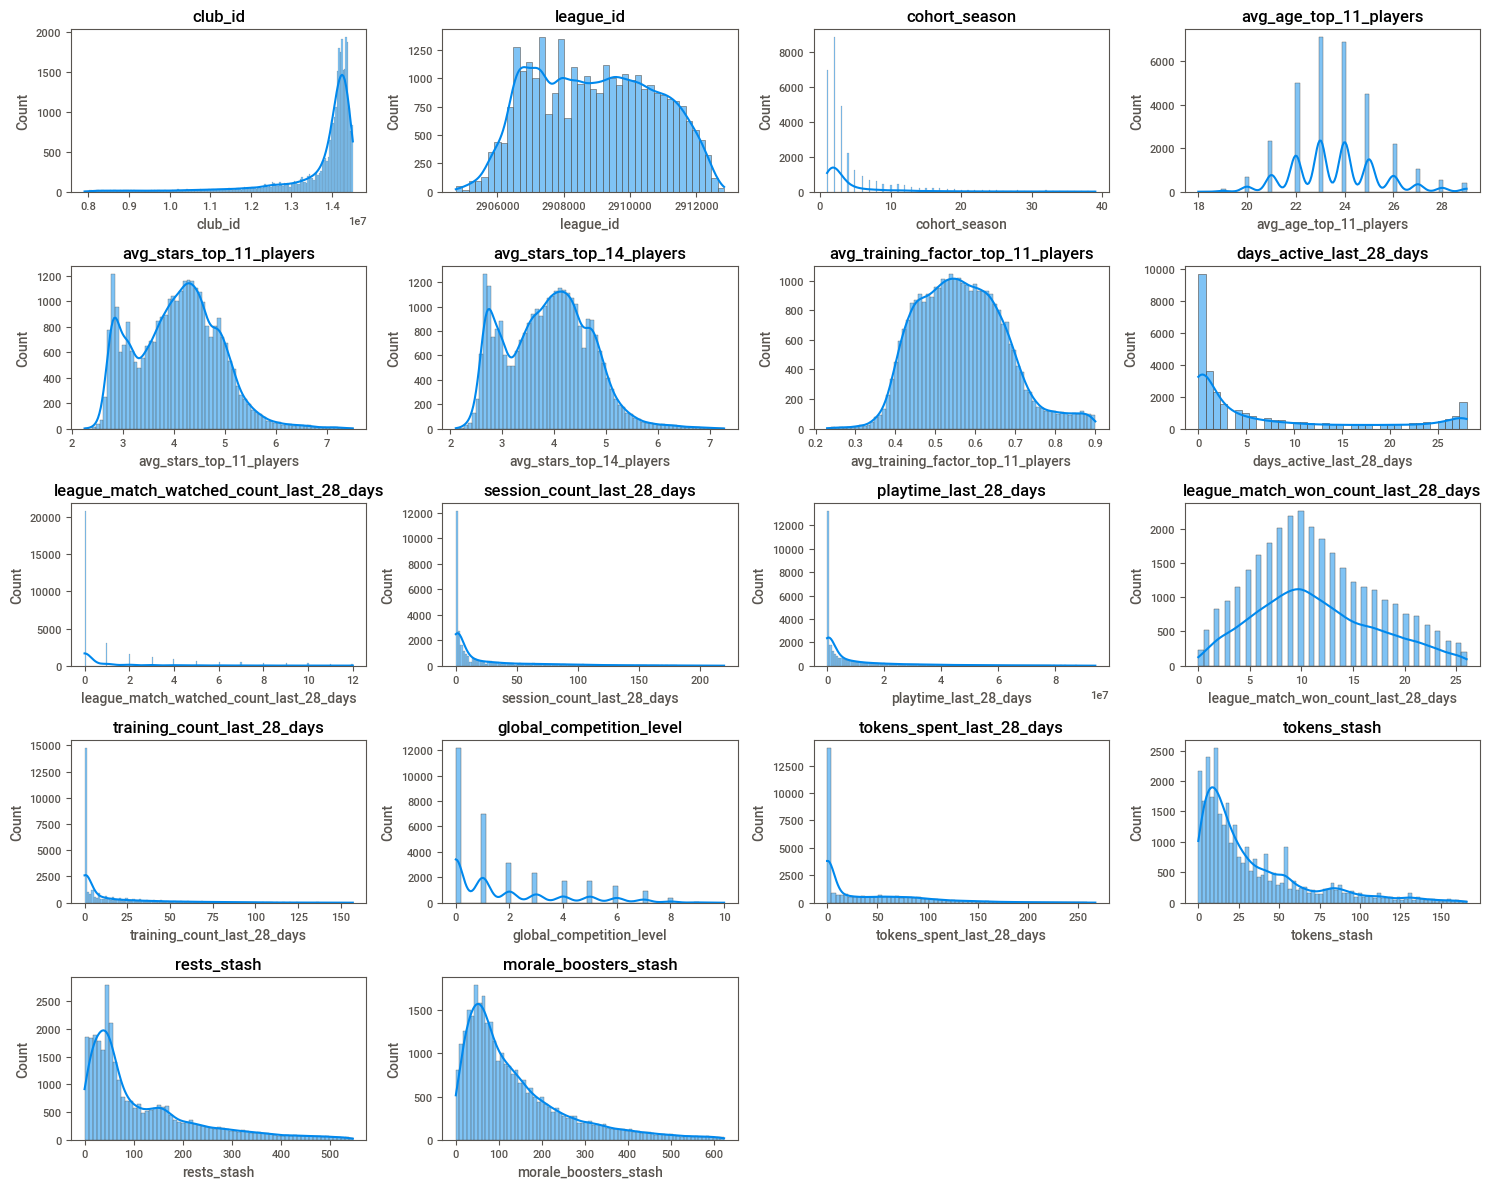

In [ ]:
# Create subplots for histograms
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(cleaned_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

The cleaned_data will be used later in the project where we will perform a sensitivity analysis in order to compare the behaviour of our algorithms in the absense of outliers and also to see if we can get meaningful insights for the average player in a global scale removing the extreme players.

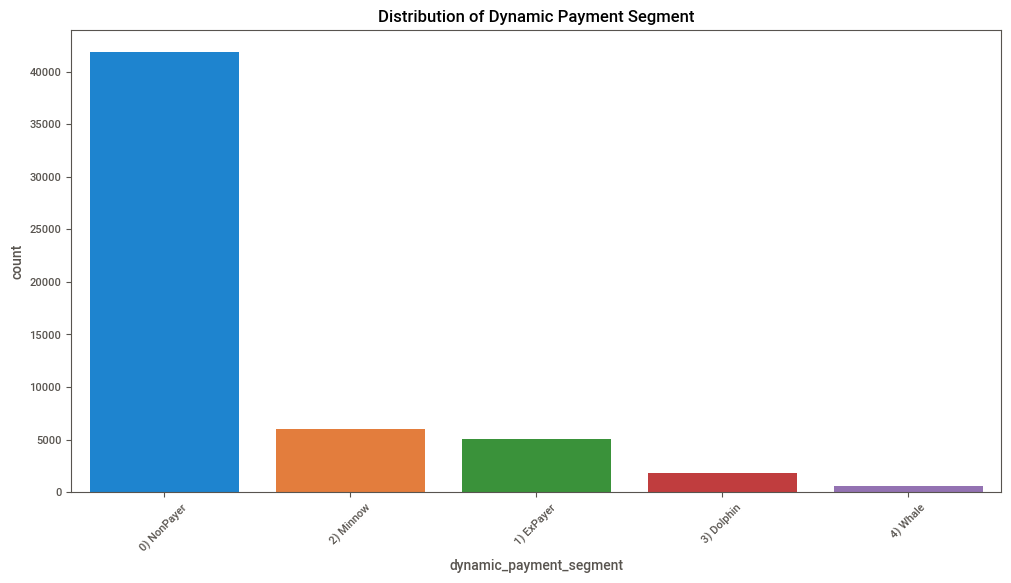

In [ ]:
# Calculate the count of each segment
segment_counts = data['dynamic_payment_segment'].value_counts()

# Sort the segments in descending order of counts
sorted_segments = segment_counts.index

# Countplot of 'dynamic_payment_segment'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='dynamic_payment_segment', order=sorted_segments)
plt.title('Distribution of Dynamic Payment Segment')
plt.xticks(rotation=45)
plt.show()

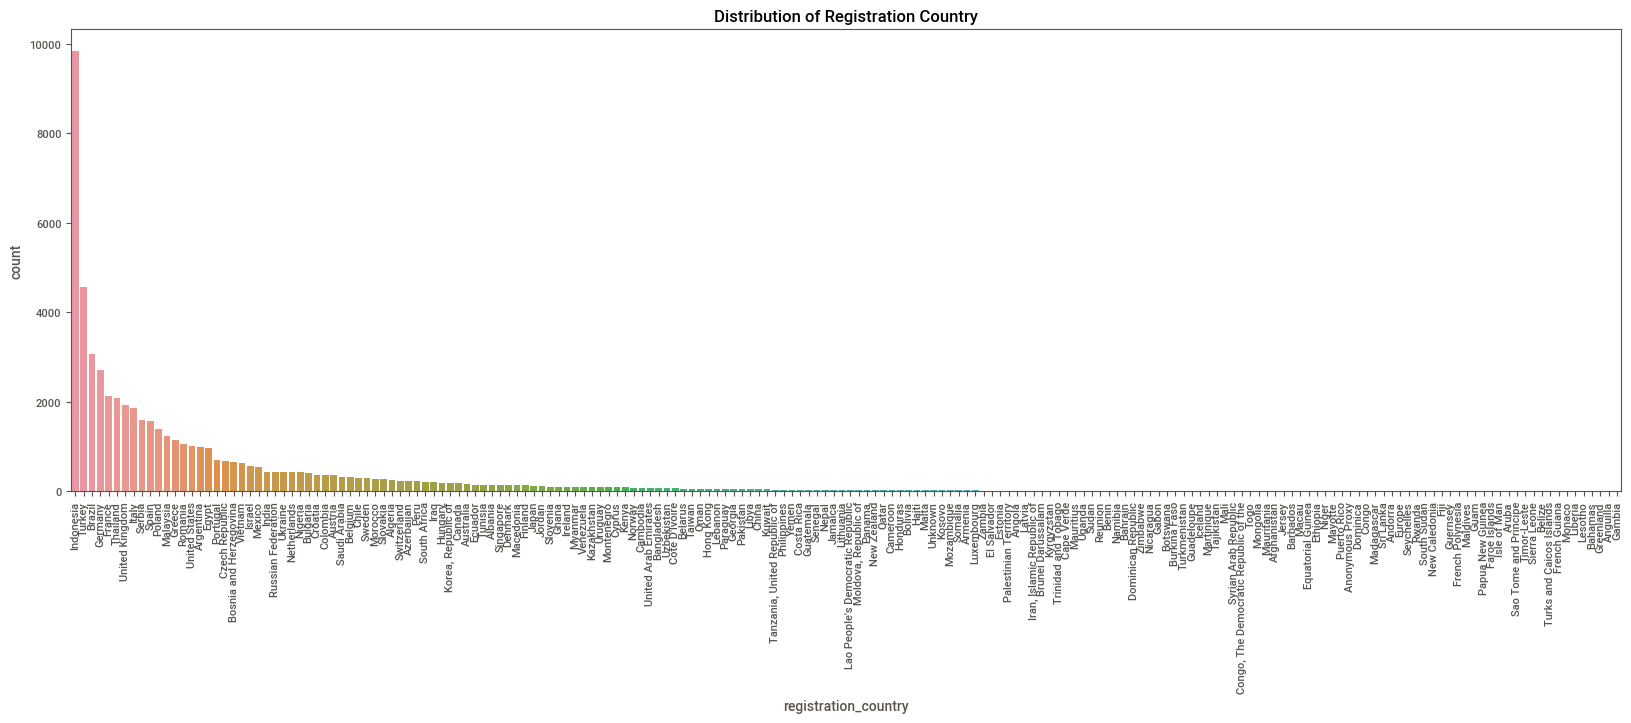

In [ ]:
# Calculate the count of each registration country
country_counts = data['registration_country'].value_counts()

# Sort the countries in descending order of counts
sorted_countries = country_counts.index

# Create a countplot in descending order of countries
plt.figure(figsize=(20, 6))
sns.countplot(data=data, x='registration_country', order=sorted_countries)
plt.title('Distribution of Registration Country')
plt.xticks(rotation=90)
plt.show()

## 3. Correlation Analysis

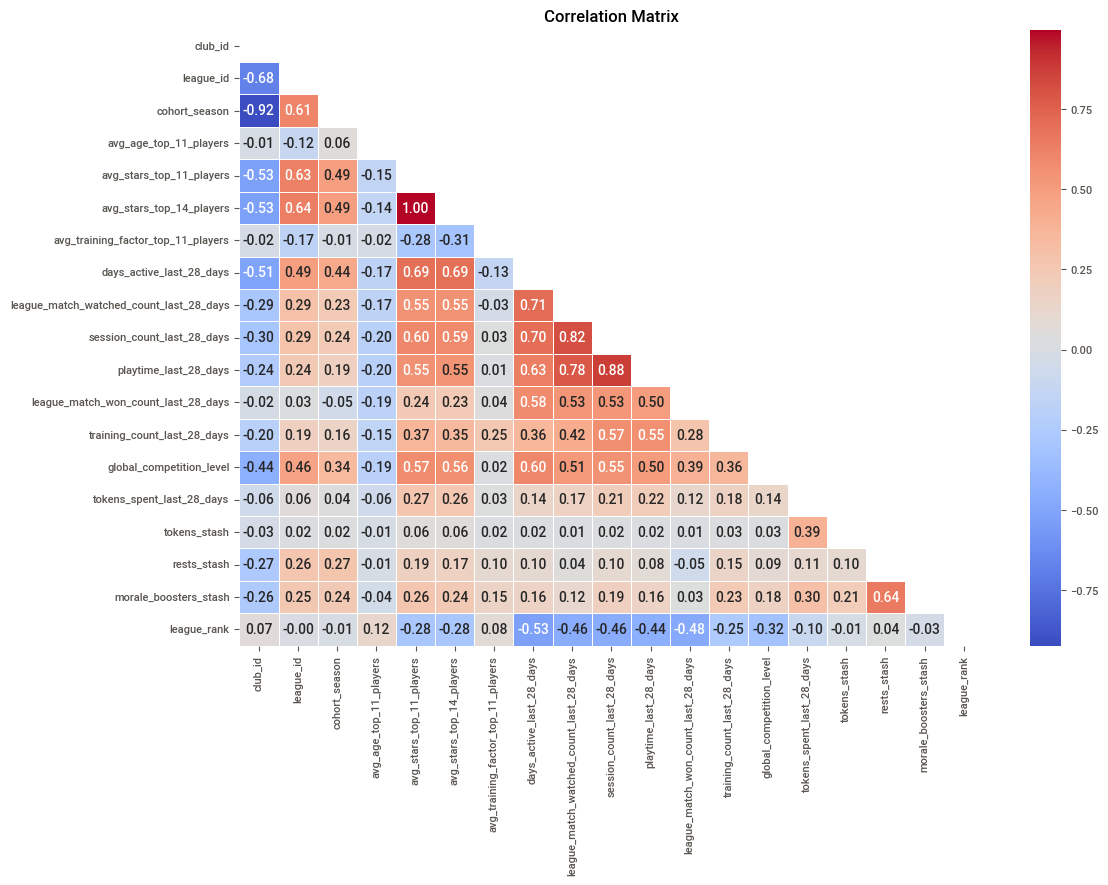

In [ ]:
# Correlation Analysis
correlation_matrix = data[numerical_cols + ['league_rank']].corr()
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Set the Pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Create a list of dictionaries to store the correlations
correlation_data = []

# Iterate through the correlation matrix and append correlations to the list
for feature1 in correlation_matrix.columns:
    for feature2 in correlation_matrix.columns:
        if feature1 != feature2:
            correlation = correlation_matrix.loc[feature1, feature2]
            correlation_data.append({"Feature 1": feature1, "Feature 2": feature2, "Correlation": correlation})

# Create a DataFrame from the list of dictionaries
correlation_df = pd.DataFrame(correlation_data)

# Sort the DataFrame by correlation in descending order
correlation_df = correlation_df.sort_values(by="Correlation", ascending=False)

# Reset the index of the DataFrame
correlation_df = correlation_df.reset_index(drop=True)

# Print the DataFrame
correlation_df

Feature 1  \
0                   avg_stars_top_11_players   
1                   avg_stars_top_14_players   
2                 session_count_last_28_days   
3                      playtime_last_28_days   
4    league_match_watched_count_last_28_days   
5                 session_count_last_28_days   
6    league_match_watched_count_last_28_days   
7                      playtime_last_28_days   
8                   days_active_last_28_days   
9    league_match_watched_count_last_28_days   
10                  days_active_last_28_days   
11                session_count_last_28_days   
12                  avg_stars_top_14_players   
13                  days_active_last_28_days   
14                  days_active_last_28_days   
15                  avg_stars_top_11_players   
16                     morale_boosters_stash   
17                               rests_stash   
18                  avg_stars_top_14_players   
19                                 league_id   
20                  days_active_last_28_days   
21                     playtime_last_28_days   
22                                 league_id   
23                  avg_stars_top_11_players   
24                                 league_id   
25                             cohort_season   
26                  days_active_last_28_days   
27                  global_competition_level   
28                  avg_stars_top_11_players   
29                session_count_last_28_days   
30                session_count_last_28_days   
31                  avg_stars_top_14_players   
32                  days_active_last_28_days   
33       league_match_won_count_last_28_days   
34                  avg_stars_top_11_players   
35                  global_competition_level   
36                session_count_last_28_days   
37               training_count_last_28_days   
38                  global_competition_level   
39                  avg_stars_top_14_players   
40               training_count_last_28_days   
41                     playtime_last_28_days   
42                  avg_stars_top_11_players   
43   league_match_watched_count_last_28_days   
44                session_count_last_28_days   
45                  global_competition_level   
46                  avg_stars_top_11_players   
47                     playtime_last_28_days   
48   league_match_watched_count_last_28_days   
49                  avg_stars_top_14_players   
50                  avg_stars_top_14_players   
51                     playtime_last_28_days   
52       league_match_won_count_last_28_days   
53   league_match_watched_count_last_28_days   
54       league_match_won_count_last_28_days   
55                session_count_last_28_days   
56                  global_competition_level   
57   league_match_watched_count_last_28_days   
58                  global_competition_level   
59                     playtime_last_28_days   
60                     playtime_last_28_days   
61       league_match_won_count_last_28_days   
62                             cohort_season   
63                  avg_stars_top_14_players   
64                  avg_stars_top_11_players   
65                             cohort_season   
66                  days_active_last_28_days   
67                                 league_id   
68                  global_competition_level   
69                                 league_id   
70                  days_active_last_28_days   
71                             cohort_season   
72               training_count_last_28_days   
73   league_match_watched_count_last_28_days   
74                              tokens_stash   
75                 tokens_spent_last_28_days   
76       league_match_won_count_last_28_days   
77                  global_competition_level   
78                  avg_stars_top_11_players   
79               training_count_last_28_days   
80               training_count_last_28_days   
81                  days_active_last_28_days   
82               training_count_last_28_days   
83 

In [ ]:
# Filter the DataFrame for correlations above absolute 0.7
high_correlations = correlation_df[abs(correlation_df["Correlation"]) > 0.7]
high_correlations

Feature 1  \
0                   avg_stars_top_11_players   
1                   avg_stars_top_14_players   
2                 session_count_last_28_days   
3                      playtime_last_28_days   
4    league_match_watched_count_last_28_days   
5                 session_count_last_28_days   
6    league_match_watched_count_last_28_days   
7                      playtime_last_28_days   
8                   days_active_last_28_days   
9    league_match_watched_count_last_28_days   
10                  days_active_last_28_days   
11                session_count_last_28_days   
340                            cohort_season   
341                                  club_id   

                                   Feature 2  Correlation  
0                   avg_stars_top_14_players     0.996793  
1                   avg_stars_top_11_players     0.996793  
2                      playtime_last_28_days     0.875274  
3                 session_count_last_28_days     0.875274  
4                 session_count_last_28_days     0.817395  
5    league_match_watched_count_last_28_days     0.817395  
6                      playtime_last_28_days     0.784784  
7    league_match_watched_count_last_28_days     0.784784  
8    league_match_watched_count_last_28_days     0.707804  
9                   days_active_last_28_days     0.707804  
10                session_count_last_28_days     0.702992  
11                  days_active_last_28_days     0.702992  
340                                  club_id    -0.922520  
341                            cohort_season    -0.922520

In [ ]:
# Extract unique feature names from the filtered DataFrame
unique_features = pd.unique(high_correlations[['Feature 1', 'Feature 2']].values.ravel('K'))

# Print the unique feature names
print("Unique feature names with correlations above 0.7:")
for feature in unique_features:
    print(feature)

Unique feature names with correlations above 0.7:
avg_stars_top_11_players
avg_stars_top_14_players
session_count_last_28_days
playtime_last_28_days
league_match_watched_count_last_28_days
days_active_last_28_days
cohort_season
club_id


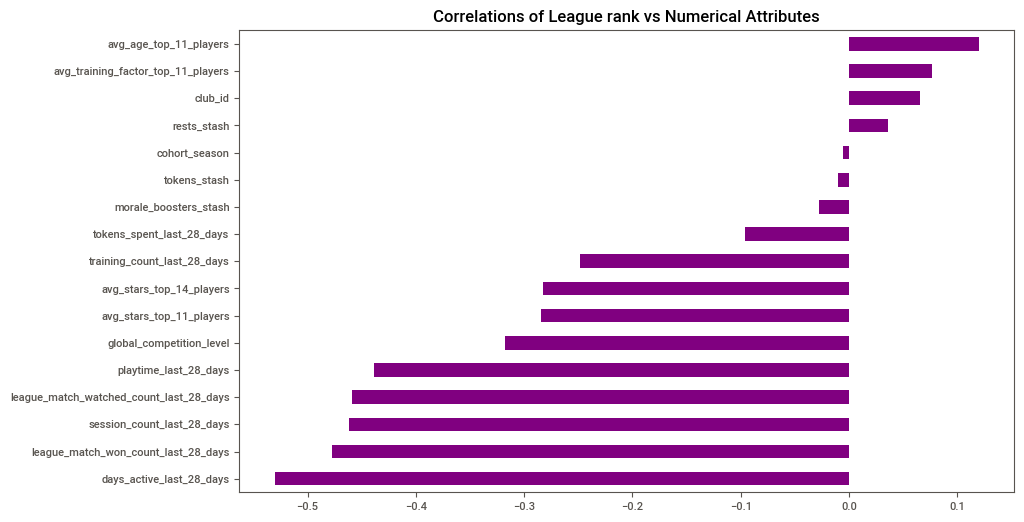

In [ ]:
# Correlations of numerical features with the target variable 'league_rank'
league_rank_correlations = data.drop(['league_rank','season', 'league_id'] , axis=1).corrwith(data['league_rank'], numeric_only=True).sort_values()
league_rank_correlations.plot(kind='barh', figsize=(10,6), color='purple', title="Correlations of League rank vs Numerical Attributes")
plt.show()

In [ ]:
# Sort the league_rank_correlations DataFrame by absolute correlation in descending order
league_rank_correlations.abs().sort_values(ascending=False).head()

days_active_last_28_days                   0.530580
league_match_won_count_last_28_days        0.477774
session_count_last_28_days                 0.462098
league_match_watched_count_last_28_days    0.459192
playtime_last_28_days                      0.438841
dtype: float64

### Statistical Tests

- Null Hypothesis (H0): There is no significant correlation between the candidate column and the target variable.
- Alternative Hypothesis (H1): There is a significant correlation between the candidate column and the target variable.

In [ ]:
# Define your candidate columns and target variable
candidate_columns = ['morale_boosters_stash', 'tokens_stash', 'cohort_season', 'rests_stash']
target_variable = 'league_rank'

# Perform correlation test and calculate p-values
p_values = {}
significant_columns = []
non_significant_columns = []
for column in candidate_columns:
    correlation, p_value = pearsonr(data[column], data[target_variable])
    p_values[column] = p_value
    if p_value < 0.05:
        significant_columns.append(column)
    else:
        non_significant_columns.append(column)

# Print the p-values
for column, p_value in p_values.items():
    print(f"{column}: p-value = {p_value}")

# Print the results
print("\nColumns rejecting the null hypothesis:")
for column in significant_columns:
    print(column)

print("\nColumns not rejecting the null hypothesis:")
for column in non_significant_columns:
    print(column)

morale_boosters_stash: p-value = 1.3766708331636e-10
tokens_stash: p-value = 0.020968472793802023
cohort_season: p-value = 0.18394587244518365
rests_stash: p-value = 1.444189633875987e-17

Columns rejecting the null hypothesis:
morale_boosters_stash
tokens_stash
rests_stash

Columns not rejecting the null hypothesis:
cohort_season


## 4. Model Development

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   season                                   55314 non-null  int64  
 1   club_id                                  55314 non-null  int64  
 2   league_id                                55314 non-null  int64  
 3   dynamic_payment_segment                  55314 non-null  object 
 4   cohort_season                            55314 non-null  int64  
 5   avg_age_top_11_players                   55314 non-null  int64  
 6   avg_stars_top_11_players                 55314 non-null  float64
 7   avg_stars_top_14_players                 55314 non-null  float64
 8   avg_training_factor_top_11_players       55314 non-null  float64
 9   days_active_last_28_days                 55314 non-null  int64  
 10  league_match_watched_count_last_28_days  55314

In [ ]:
data_model = data.copy()
data_model = data_model.drop(['season', 'avg_stars_top_14_players', 'registration_country'], axis=1)

In [ ]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55314 entries, 0 to 55313
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   club_id                                  55314 non-null  int64  
 1   league_id                                55314 non-null  int64  
 2   dynamic_payment_segment                  55314 non-null  object 
 3   cohort_season                            55314 non-null  int64  
 4   avg_age_top_11_players                   55314 non-null  int64  
 5   avg_stars_top_11_players                 55314 non-null  float64
 6   avg_training_factor_top_11_players       55314 non-null  float64
 7   days_active_last_28_days                 55314 non-null  int64  
 8   league_match_watched_count_last_28_days  55314 non-null  int64  
 9   session_count_last_28_days               55314 non-null  int64  
 10  playtime_last_28_days                    55314

In [ ]:
data_model.shape

(55314, 21)

### Data Splitting

In [ ]:
# Split the data into input features (X) and target variable (y)
X = data_model.drop('league_rank', axis=1)
y = data_model['league_rank']

In [ ]:
# Initialize lists to store categorical and numerical column names
categorical_cols = []
numerical_cols = []

# Iterate through the DataFrame columns and classify them
for column in data_model.columns:
    if data_model[column].dtype == 'object':
        categorical_cols.append(column)
    elif column != 'league_rank':
        numerical_cols.append(column)

In [ ]:
categorical_cols

['dynamic_payment_segment', 'registration_platform_specific', 'continent']

In [ ]:
numerical_cols

['club_id',
 'league_id',
 'cohort_season',
 'avg_age_top_11_players',
 'avg_stars_top_11_players',
 'avg_training_factor_top_11_players',
 'days_active_last_28_days',
 'league_match_watched_count_last_28_days',
 'session_count_last_28_days',
 'playtime_last_28_days',
 'league_match_won_count_last_28_days',
 'training_count_last_28_days',
 'global_competition_level',
 'tokens_spent_last_28_days',
 'tokens_stash',
 'rests_stash',
 'morale_boosters_stash']

### Creating Pipeline

We will use regression algorithms that are robust to outliers, such as HuberRegressor, TheilSenRegressor, RANSACRegressor, SVC with rbf kernel, and tree-based algorithms.

In [ ]:
# Create a preprocessing pipeline
preprocessing_pipeline = ColumnTransformer([
    ('categorical', OneHotEncoder(), categorical_cols),
    ('numerical', RobustScaler(), numerical_cols)
])

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection

In [ ]:
# Create a pipeline with multiple regression algorithms
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Huber Regression', HuberRegressor(max_iter=1000)),
    ('Theil-Sen Regression', TheilSenRegressor()),
    ('RANSAC Regression', RANSACRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('XGBoost', XGBRegressor()),
    ('SVR', SVR(kernel='rbf'))
]

### Model Evaluation

In [ ]:
results = []

for name, regressor in regressors:
    # Create a pipeline with preprocessing and the current regressor
    pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('regressor', regressor)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = pipeline.predict(X_val)

    # Calculate the Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val, y_val_pred)

    # Store the results
    results.append({'Regressor': name, 'MAE': mae})

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

                  Regressor           MAE
0         Linear Regression  2.555472e+00
1          Huber Regression  2.536845e+00
2      Theil-Sen Regression  2.759366e+00
3         RANSAC Regression  6.490134e+08
4  Random Forest Regression  2.277186e+00
5                   XGBoost  2.239238e+00
6                       SVR  2.461121e+00


In [ ]:
# Finding the best regressor
best_regressor = results_df.loc[results_df['MAE'].idxmin(), 'Regressor']
best_regressor

'XGBoost'

## 5. Hyperparameter Tuning

In [ ]:
# Create a pipeline with preprocessing and the XGBoost regressor
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('regressor', xgb.XGBRegressor())
])

# Define the parameter search space for XGBoost
param_distributions = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.3],
    'regressor__max_depth': [3, 5, 7],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__gamma': [0, 0.1, 0.2],
    'regressor__reg_alpha': [0, 0.1, 0.5],
    'regressor__reg_lambda': [0, 0.1, 0.5]
}

# Perform randomized search to find the best hyperparameters
randomized_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, scoring='neg_mean_absolute_error', cv=5)
randomized_search.fit(X_train, y_train)

# Get the best hyperparameters and retrain the best model
best_pipeline = randomized_search.best_estimator_
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['dynamic_payment_segment',
                                                   'registration_platform_specific',
                                                   'continent']),
                                                 ('numerical', RobustScaler(),
                                                  ['club_id', 'league_id',
                                                   'cohort_season',
                                                   'avg_age_top_11_players',
                                                   'avg_stars_top_11_players',
                                                   'avg_training_factor_top_11_players',
                                                   'days_active_last_28_day...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# Define the file path to save the pipeline on your desktop
file_path = r'C:\Users\User\Desktop\Nordeus_Data_Science_Challenge\best_pipeline.pkl'

# Save the best pipeline
joblib.dump(best_pipeline, file_path)

['C:\\Users\\User\\Desktop\\Nordeus_Data_Science_Challenge\\best_pipeline.pkl']

In [ ]:
# Load the saved pipeline
best_pipeline = joblib.load(r'C:\Users\User\Downloads\best_pipeline.pkl')

In [ ]:
# Make predictions on the validation set
y_val_pred = best_pipeline.predict(X_val)

# Calculate the MAE
mae = mean_absolute_error(y_val, y_val_pred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2.239866995392161


### Ensemble Method

In [ ]:
# Instantiate the base regressors
reg_rf = RandomForestRegressor()
reg_xgb = XGBRegressor()
reg_ridge = Ridge(random_state=500)
reg_dt = DecisionTreeRegressor()

# Instantiate the meta regressor
reg_meta = LinearRegression()

# Build the Stacking regressor
reg_stack = StackingRegressor(
    estimators=[('Random Forest', reg_rf), ('XGBoost', reg_xgb)],
    final_estimator=reg_meta
)

# Create a pipeline with preprocessing and the stacking regressor
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('regressor', reg_stack)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = pipeline.predict(X_val)

# Calculate the Mean Absolute Error (MAE) on the validation set
mae = mean_absolute_error(y_val, y_val_pred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2.226388185680344


### Model Comparison and Selection

In [ ]:
# Select the model with the lowest MAE
best_model = reg_stack

# Fit the pipeline on the entire training dataset
pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['dynamic_payment_segment',
                                                   'registration_platform_specific',
                                                   'continent']),
                                                 ('numerical', RobustScaler(),
                                                  ['club_id', 'league_id',
                                                   'cohort_season',
                                                   'avg_age_top_11_players',
                                                   'avg_stars_top_11_players',
                                                   'avg_training_factor_top_11_players',
                                                   'days_active_last_28_day...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                   final_estimator=LinearRegression()))])

## 6. Prediction on Test Data

### Preprocessing Test Data

In [ ]:
# Load the test dataset
test_data = pd.read_csv('jobfair_test.csv')
test_data.head()

season   club_id  league_id dynamic_payment_segment  cohort_season  \
0     174  14542747    2951383             0) NonPayer              1   
1     174  11019672    2954266             0) NonPayer             21   
2     174  14358567    2951259             0) NonPayer              2   
3     174  14644461    2949546             0) NonPayer              1   
4     174  13718978    2952772             0) NonPayer              6   

   avg_age_top_11_players  avg_stars_top_11_players  avg_stars_top_14_players  \
0                      23                  4.295345                  4.100333   
1                      24                  4.704727                  4.484933   
2                      22                  2.923867                  2.819171   
3                      22                  3.114776                  2.977457   
4                      23                  4.194497                  4.114257   

   avg_training_factor_top_11_players  days_active_last_28_days  \
0                            0.469406                         8   
1                            0.317702                        28   
2                            0.669540                         0   
3                            0.639923                         3   
4                            0.486229                        26   

   league_match_watched_count_last_28_days  session_count_last_28_days  \
0                                        0                          10   
1                                        5                          61   
2                                        0                           0   
3                                        0                           3   
4                                        3                          80   

   playtime_last_28_days registration_country registration_platform_specific  \
0                2580346               France                      iOS Phone   
1               15521681            Indonesia                  Android Phone   
2                      0               Brazil                  Android Phone   
3                1136208                Spain                  Android Phone   
4               43655679               France                  Android Phone   

   league_match_won_count_last_28_days  training_count_last_28_days  \
0                                   10                            6   
1                                   16                           26   
2                                    7                            0   
3                                    2                            1   
4                                   22                           46   

   global_competition_level  tokens_spent_last_28_days  tokens_stash  \
0                       NaN                         82            18   
1                       7.0                        153            65   
2                       NaN                          0           138   
3                       NaN                          2            43   
4                       1.0                        100            30   

   rests_stash  morale_boosters_stash  
0          177                    106  
1         1030                    717  
2          156                     98  
3           43                     25  
4           45                     53

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60270 entries, 0 to 60269
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   season                                   60270 non-null  int64  
 1   club_id                                  60270 non-null  int64  
 2   league_id                                60270 non-null  int64  
 3   dynamic_payment_segment                  60270 non-null  object 
 4   cohort_season                            60270 non-null  int64  
 5   avg_age_top_11_players                   60270 non-null  int64  
 6   avg_stars_top_11_players                 60270 non-null  float64
 7   avg_stars_top_14_players                 60270 non-null  float64
 8   avg_training_factor_top_11_players       60270 non-null  float64
 9   days_active_last_28_days                 60270 non-null  int64  
 10  league_match_watched_count_last_28_days  60270

In [ ]:
len(test_data['registration_country'].unique())

196

In [ ]:
# Check unique values in the 'registration_country' column of the test dataset
test_countries = test_data['registration_country'].unique()

# Find new countries not present in the original mapping
new_countries = set(test_countries) - set(country_to_continent.keys())

# Print the new countries
print("New countries in the test dataset:")
print(new_countries)

New countries in the test dataset:
{'Aland Islands', 'Virgin Islands, U.S.', 'Cayman Islands', 'Saint Vincent and the Grenadines', 'Suriname', 'Liechtenstein', 'Curacao', 'Bermuda', 'Guinea', 'Djibouti', 'Antigua and Barbuda', 'Bhutan', 'Central African Republic'}


In [ ]:
# Mapping of countries to continents
country_to_continent = {
    'Portugal': 'Europe',
    'Turkey': 'Asia',
    'Belgium': 'Europe',
    'Malaysia': 'Asia',
    'Italy': 'Europe',
    'Cambodia': 'Asia',
    'Indonesia': 'Asia',
    'Algeria': 'Africa',
    'Spain': 'Europe',
    'Costa Rica': 'North America',
    'Argentina': 'South America',
    'Germany': 'Europe',
    'Saudi Arabia': 'Asia',
    'Thailand': 'Asia',
    'Austria': 'Europe',
    'Korea, Republic of': 'Asia',
    'South Africa': 'Africa',
    'Romania': 'Europe',
    'Greece': 'Europe',
    'Netherlands': 'Europe',
    'Bulgaria': 'Europe',
    'Czech Republic': 'Europe',
    'Nigeria': 'Africa',
    'France': 'Europe',
    'Somalia': 'Africa',
    'Brazil': 'South America',
    'United States': 'North America',
    'Chile': 'South America',
    'Poland': 'Europe',
    'United Kingdom': 'Europe',
    'Israel': 'Asia',
    'Jersey': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Norway': 'Europe',
    'Cyprus': 'Asia',
    'Slovakia': 'Europe',
    'Ireland': 'Europe',
    'Switzerland': 'Europe',
    'Mexico': 'North America',
    'Uruguay': 'South America',
    'Andorra': 'Europe',
    'Japan': 'Asia',
    'Serbia': 'Europe',
    'India': 'Asia',
    'Egypt': 'Africa',
    'Slovenia': 'Europe',
    'Albania': 'Europe',
    'Croatia': 'Europe',
    'Canada': 'North America',
    'China': 'Asia',
    'Botswana': 'Africa',
    'Colombia': 'South America',
    'Sweden': 'Europe',
    'Niger': 'Africa',
    'Azerbaijan': 'Asia',
    'Ukraine': 'Europe',
    'Ecuador': 'South America',
    'Russian Federation': 'Europe',
    'Senegal': 'Africa',
    'Luxembourg': 'Europe',
    'Myanmar': 'Asia',
    'Monaco': 'Europe',
    'Georgia': 'Asia',
    'Vietnam': 'Asia',
    'Tunisia': 'Africa',
    'Hong Kong': 'Asia',
    'Peru': 'South America',
    'Dominica': 'North America',
    'Bangladesh': 'Asia',
    'Lebanon': 'Asia',
    'Venezuela': 'South America',
    'Hungary': 'Europe',
    'Uzbekistan': 'Asia',
    'Congo, The Democratic Republic of the': 'Africa',
    'New Zealand': 'Oceania',
    'Afghanistan': 'Asia',
    'Nicaragua': 'North America',
    'Iraq': 'Asia',
    'Jordan': 'Asia',
    'Morocco': 'Africa',
    "Cote D'Ivoire": 'Africa',
    'Yemen': 'Asia',
    'Denmark': 'Europe',
    'Reunion': 'Africa',
    'Haiti': 'North America',
    'Macedonia': 'Europe',
    'United Arab Emirates': 'Asia',
    'Ghana': 'Africa',
    'Oman': 'Asia',
    'Malta': 'Europe',
    'Australia': 'Oceania',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'Kazakhstan': 'Asia',
    'Philippines': 'Asia',
    'Taiwan': 'Asia',
    'Guatemala': 'North America',
    'Finland': 'Europe',
    'Kuwait': 'Asia',
    'Benin': 'Africa',
    'Singapore': 'Asia',
    'Europe': 'Europe',
    'Sudan': 'Africa',
    'Armenia': 'Asia',
    'Macau': 'Asia',
    'Kenya': 'Africa',
    'Barbados': 'North America',
    'Iran, Islamic Republic of': 'Asia',
    'Trinidad and Tobago': 'North America',
    'Lithuania': 'Europe',
    'Paraguay': 'South America',
    'Gabon': 'Africa',
    'Moldova, Republic of': 'Europe',
    'Libya': 'Africa',
    'Rwanda': 'Africa',
    'Kosovo': 'Europe',
    'Cameroon': 'Africa',
    'Honduras': 'North America',
    'Zimbabwe': 'Africa',
    'El Salvador': 'North America',
    'Mauritania': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Seychelles': 'Africa',
    'Brunei Darussalam': 'Asia',
    'Mongolia': 'Asia',
    'Fiji': 'Oceania',
    'Montenegro': 'Europe',
    'Belarus': 'Europe',
    'Pakistan': 'Asia',
    'Congo': 'Africa',
    'Tanzania, United Republic of': 'Africa',
    'Mali': 'Africa',
    'Jamaica': 'North America',
    'Panama': 'North America',
    'Angola': 'Africa',
    'Bolivia': 'South America',
    'Palestinian Territory': 'Asia',
    'Estonia': 'Europe',
    'Equatorial Guinea': 'Africa',
    'Bahrain': 'Asia',
    'Mauritius': 'Africa',
    'Turkmenistan': 'Asia',
    'Qatar': 'Asia',
    'Unknown': 'Unknown',
    "Lao People's Democratic Republic": 'Asia',
    'Latvia': 'Europe',
    'Syrian Arab Republic': 'Asia',
    'Zambia': 'Africa',
    'Mozambique': 'Africa',
    'Martinique': 'North America',
    'Tajikistan': 'Asia',
    'Bahamas': 'North America',
    'French Polynesia': 'Oceania',
    'Cape Verde': 'Africa',
    'Uganda': 'Africa',
    'Burkina Faso': 'Africa',
    'Dominican Republic': 'North America',
    'Guadeloupe': 'North America',
    'Puerto Rico': 'North America',
    'Mayotte': 'Africa',
    'Anguilla': 'North America',
    'Greenland': 'North America',
    'Madagascar': 'Africa',
    'Iceland': 'Europe',
    'Sri Lanka': 'Asia',
    'South Sudan': 'Africa',
    'Guernsey': 'Europe',
    'Lesotho': 'Africa',
    'Togo': 'Africa',
    'Liberia': 'Africa',
    'Ethiopia': 'Africa',
    'French Guiana': 'South America',
    'Sierra Leone': 'Africa',
    'Turks and Caicos Islands': 'North America',
    'Belize': 'North America',
    'Anonymous Proxy': 'Unknown',
    'Timor-Leste': 'Asia',
    'Sao Tome and Principe': 'Africa',
    'Isle of Man': 'Europe',
    'New Caledonia': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Guam': 'Oceania',
    'Maldives': 'Asia',
    'Faroe Islands': 'Europe',
    'Aruba': 'North America',
    'Gambia': 'Africa',
    'Bhutan': 'Asia',
    'Aland Islands': 'Europe',
    'Virgin Islands, U.S.': 'North America',
    'Suriname': 'South America',
    'Cayman Islands': 'North America',
    'Djibouti': 'Africa',
    'Liechtenstein': 'Europe',
    'Antigua and Barbuda': 'North America',
    'Central African Republic': 'Africa',
    'Bermuda': 'North America',
    'Guinea': 'Africa',
    'Curacao': 'North America',
    'Saint Vincent and the Grenadines': 'North America'
}

# Create a new 'continent' column based on the mapping
test_data['continent'] = test_data['registration_country'].map(country_to_continent)

In [ ]:
test_data['continent'].unique()

array(['Europe', 'Asia', 'South America', 'Oceania', 'Africa',
       'North America', 'Unknown'], dtype=object)

In [ ]:
# Find rows where 'continent' is 'Unknown'
unknown_rows = test_data[test_data['continent'] == 'Unknown']

# Display the count and unique entries
print("Number of rows with 'Unknown' continent:", len(unknown_rows))
print("Unique entries with 'Unknown' continent:")
print(unknown_rows['registration_country'].unique())

Number of rows with 'Unknown' continent: 37
Unique entries with 'Unknown' continent:
['Unknown' 'Anonymous Proxy']


In [ ]:
test_data.isnull().sum()

season                                         0
club_id                                        0
league_id                                      0
dynamic_payment_segment                        0
cohort_season                                  0
avg_age_top_11_players                         0
avg_stars_top_11_players                       0
avg_stars_top_14_players                       0
avg_training_factor_top_11_players             0
days_active_last_28_days                       0
league_match_watched_count_last_28_days        0
session_count_last_28_days                     0
playtime_last_28_days                          0
registration_country                           0
registration_platform_specific                 0
league_match_won_count_last_28_days            0
training_count_last_28_days                    0
global_competition_level                   17922
tokens_spent_last_28_days                      0
tokens_stash                                   0
rests_stash         

In [ ]:
# Imputing missing values with 0 in 'global_competition_level'
imputer = SimpleImputer(strategy='constant', fill_value=0)
test_data['global_competition_level'] = imputer.fit_transform(test_data[['global_competition_level']])

In [ ]:
test_data['global_competition_level'] = test_data['global_competition_level'].astype(int)

### Making Predictions

In [ ]:
# Drop the target variable 'league_rank' and unwanted columns
X_test = test_data.drop(['season', 'avg_stars_top_14_players', 'registration_country'], axis=1)

# Make predictions on the test set
predictions_test = pipeline.predict(X_test)

# Round the predicted values and clip them to the desired range (1 to 14)
rounded_predictions = np.clip(np.round(predictions_test), 1, 14)

### Saving Predictions to CSV

In [ ]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'club_id': test_data['club_id'], 'predicted_league_rank': rounded_predictions})

# Save predictions to CSV
predictions_df.to_csv('league_rank_predictions.csv', index=False)

## 7. APPENDIX OF ADDITIONAL ANALYSIS

### Dropping Independent Variables of High Correllation

In [ ]:
data_model2 = data.copy()
data_model2 = data_model2.drop(['season', 'avg_stars_top_14_players', 'registration_country', 'playtime_last_28_days',
                              'league_match_watched_count_last_28_days', 'days_active_last_28_days',
                              'morale_boosters_stash', 'tokens_stash', 'rests_stash'], axis=1)

In [ ]:
data_model2.info()

In [ ]:
data_model2.shape

(55314, 15)

In [ ]:
# Split the data into input features (X) and target variable (y)
X = data_model2.drop('league_rank', axis=1)
y = data_model2['league_rank']

In [ ]:
# Initialize lists to store categorical and numerical column names
categorical_cols = []
numerical_cols = []

# Iterate through the DataFrame columns and classify them
for column in data_model2.columns:
    if data_model2[column].dtype == 'object':
        categorical_cols.append(column)
    elif column != 'league_rank':
        numerical_cols.append(column)

In [ ]:
# Create a preprocessing pipeline
preprocessing_pipeline = ColumnTransformer([
    ('categorical', OneHotEncoder(), categorical_cols),
    ('numerical', RobustScaler(), numerical_cols)
])

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a pipeline with multiple regression algorithms
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Huber Regression', HuberRegressor(max_iter=1000)),
    ('Theil-Sen Regression', TheilSenRegressor()),
    ('RANSAC Regression', RANSACRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('XGBoost', XGBRegressor()),
    ('SVR', SVR(kernel='rbf'))
]

In [ ]:
results = []

for name, regressor in regressors:
    # Create a pipeline with preprocessing and the current regressor
    pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('regressor', regressor)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = pipeline.predict(X_val)

    # Calculate the Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val, y_val_pred)

    # Store the results
    results.append({'Regressor': name, 'MAE': mae})

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

                  Regressor       MAE
0         Linear Regression  2.735987
1          Huber Regression  2.715941
2      Theil-Sen Regression  2.993876
3         RANSAC Regression  3.514811
4  Random Forest Regression  2.285541
5                   XGBoost  2.258639
6                       SVR  2.467475


### Sensitivity Analysis (Outlier Removal)

In [ ]:
data_model3 = cleaned_data.copy()

In [ ]:
data_model3.info()

In [ ]:
# Split the data into input features (X) and target variable (y)
X = data_model3.drop('league_rank', axis=1)
y = data_model3['league_rank']

In [ ]:
# Initialize lists to store categorical and numerical column names
categorical_cols = []
numerical_cols = []

# Iterate through the DataFrame columns and classify them
for column in data_model3.columns:
    if data_model3[column].dtype == 'object':
        categorical_cols.append(column)
    elif column != 'league_rank':
        numerical_cols.append(column)

In [ ]:
# Create a preprocessing pipeline
preprocessing_pipeline = ColumnTransformer([
    ('categorical', OneHotEncoder(), categorical_cols),
    ('numerical', StandardScaler(), numerical_cols)
])

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a pipeline with multiple regression algorithms
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Huber Regression', HuberRegressor(max_iter=1000)),
    ('Theil-Sen Regression', TheilSenRegressor()),
    ('RANSAC Regression', RANSACRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('XGBoost', XGBRegressor()),
    ('SVR', SVR(kernel='rbf'))
]

In [ ]:
results = []

for name, regressor in regressors:
    # Create a pipeline with preprocessing and the current regressor
    pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('regressor', regressor)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = pipeline.predict(X_val)

    # Calculate the Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val, y_val_pred)

    # Store the results
    results.append({'Regressor': name, 'MAE': mae})

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

### Using Extra Feature Engineering

In [ ]:
data_model4 = data.copy()

In [ ]:
data_model4.info()

In [ ]:
# New Feature: Player Quality Ratio
data_model4['avg_training_ratio'] = data_model4['avg_training_factor_top_11_players'] / data_model4['avg_stars_top_11_players']

In [ ]:
# New Feature: Total Playtime
data_model4['total_playtime_last_28_days'] = data_model4['session_count_last_28_days'] * data_model4['playtime_last_28_days']

In [ ]:
# New Feature: Player Performance Index
data_model4['player_performance_index'] = data_model4['avg_stars_top_11_players'] * data_model4['avg_training_factor_top_11_players']

In [ ]:
# # New Feature: Active Days per Session
# data_model4['active_days_per_session'] = data_model4['days_active_last_28_days'] / data_model4['session_count_last_28_days']

In [ ]:
data_model4 = data_model4.drop(['season', 'avg_stars_top_14_players', 'registration_country', 'playtime_last_28_days',
                              'league_match_watched_count_last_28_days', 'days_active_last_28_days',
                              'morale_boosters_stash', 'tokens_stash', 'rests_stash'], axis=1)

In [ ]:
data_model4.fillna(0, inplace=True)

In [ ]:
data_model4.info()

In [ ]:
# Split the data into input features (X) and target variable (y)
X = data_model4.drop('league_rank', axis=1)
y = data_model4['league_rank']

In [ ]:
# Initialize lists to store categorical and numerical column names
categorical_cols = []
numerical_cols = []

# Iterate through the DataFrame columns and classify them
for column in data_model4.columns:
    if data_model4[column].dtype == 'object':
        categorical_cols.append(column)
    elif column != 'league_rank':
        numerical_cols.append(column)

In [ ]:
# Create a preprocessing pipeline
preprocessing_pipeline = ColumnTransformer([
    ('categorical', OneHotEncoder(), categorical_cols),
    ('numerical', RobustScaler(), numerical_cols)
])

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a pipeline with multiple regression algorithms
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Huber Regression', HuberRegressor(max_iter=1000)),
    ('Theil-Sen Regression', TheilSenRegressor()),
    ('RANSAC Regression', RANSACRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('XGBoost', XGBRegressor()),
    ('SVR', SVR(kernel='rbf'))
]

In [ ]:
results = []

for name, regressor in regressors:
    # Create a pipeline with preprocessing and the current regressor
    pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('regressor', regressor)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = pipeline.predict(X_val)

    # Calculate the Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val, y_val_pred)

    # Store the results
    results.append({'Regressor': name, 'MAE': mae})

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

                  Regressor           MAE
0         Linear Regression  2.678745e+00
1          Huber Regression  2.657353e+00
2      Theil-Sen Regression  2.910773e+00
3         RANSAC Regression  2.691151e+08
4  Random Forest Regression  2.285194e+00
5                   XGBoost  2.254734e+00
6                       SVR  2.477302e+00


### Addressing Skewness of Variables

In [ ]:
data_model5 = data.copy()
data_model5 = data_model5.drop(['season', 'avg_stars_top_14_players', 'registration_country'], axis=1)

In [ ]:
# Calculate skewness for each column in the dataset
skewness = data_model5.skew()

# Select columns with skewness greater than a threshold (>0.5)
skewed_columns = skewness[skewness > 0.5].index

skewed_columns

In [ ]:
import pandas as pd
from scipy import stats

# Select columns to apply the Yeo-Johnson transformation
columns_to_transform = ['cohort_season', 'avg_age_top_11_players', 'avg_stars_top_11_players',
        'avg_training_factor_top_11_players', 'league_match_watched_count_last_28_days', 'session_count_last_28_days',
       'playtime_last_28_days', 'training_count_last_28_days', 'global_competition_level', 'tokens_spent_last_28_days', 'tokens_stash',
       'rests_stash', 'morale_boosters_stash']

# Apply the Yeo-Johnson transformation
for col in columns_to_transform:
    data_model5[col], _ = stats.yeojohnson(data_model5[col])

In [ ]:
# Select columns to plot
columns_to_plot = ['cohort_season', 'avg_age_top_11_players', 'avg_stars_top_11_players',
       'avg_training_factor_top_11_players', 'league_match_watched_count_last_28_days', 'session_count_last_28_days',
       'playtime_last_28_days', 'training_count_last_28_days', 'global_competition_level', 'tokens_spent_last_28_days', 'tokens_stash',
       'rests_stash', 'morale_boosters_stash']

# Set the number of subplots based on the number of columns
num_plots = len(columns_to_plot)
num_rows = num_plots // 3 + (num_plots % 3 > 0)
num_cols = 3

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array in case of multiple rows
axes = axes.flatten()

# Loop over the columns and plot the distributions
for i, col in enumerate(columns_to_plot):
    axes[i].hist(data_model5[col], bins=20, alpha=0.5)
    axes[i].set_title(col)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
data_model5.info()

In [ ]:
# Split the data into input features (X) and target variable (y)
X = data_model5.drop('league_rank', axis=1)
y = data_model5['league_rank']

In [ ]:
# Initialize lists to store categorical and numerical column names
categorical_cols = []
numerical_cols = []

# Iterate through the DataFrame columns and classify them
for column in data_model5.columns:
    if data_model5[column].dtype == 'object':
        categorical_cols.append(column)
    elif column != 'league_rank':
        numerical_cols.append(column)

In [ ]:
# Create a preprocessing pipeline
preprocessing_pipeline = ColumnTransformer([
    ('categorical', OneHotEncoder(), categorical_cols),
    ('numerical', StandardScaler(), numerical_cols)
])

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a pipeline with multiple regression algorithms
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Huber Regression', HuberRegressor(max_iter=1000)),
    ('Theil-Sen Regression', TheilSenRegressor()),
    ('RANSAC Regression', RANSACRegressor()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('XGBoost', XGBRegressor()),
    ('SVR', SVR(kernel='rbf'))
]

In [ ]:
results = []

for name, regressor in regressors:
    # Create a pipeline with preprocessing and the current regressor
    pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('regressor', regressor)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the validation set
    y_val_pred = pipeline.predict(X_val)

    # Calculate the Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_val, y_val_pred)

    # Store the results
    results.append({'Regressor': name, 'MAE': mae})

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

### Feature Selection

We tried feature selection using different popular methods such as Lasso, SelectKBest, VIF(Variance Inflation Factor).

In [ ]:
# Define features and target variable
X = data.drop('league_rank', axis=1)
y = data['league_rank']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor


# One-hot encode categorical columns for the entire dataset
X_encoded = pd.get_dummies(X, columns=['dynamic_payment_segment', 'registration_country', 'registration_platform_specific'])

# Standardize the features for the entire dataset
scaler = StandardScaler()
X_encoded_standardized = scaler.fit_transform(X_encoded)

# Split the standardized data into training and testing sets
X_train_standardized, X_test_standardized, y_train, y_test = train_test_split(X_encoded_standardized, y, test_size=0.2, random_state=42)

# Fit Lasso regression model
lasso = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso.fit(X_train_standardized, y_train)

# Get selected features
selected_features_lasso = X_encoded.columns[lasso.coef_ != 0]

# Print selected features for Lasso
print("Selected Features using Lasso:")
print(selected_features_lasso)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_standardized, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features (adjust the number as needed)
top_features_rf = feature_importance_df.head(15)['Feature'].tolist()

# Print selected features for Random Forest
print("\nSelected Features using Random Forest:")
print(top_features_rf)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Select the top k features based on ANOVA F-statistics
k_best = SelectKBest(score_func=f_classif, k=15)

# Fit and transform the data
X_k_best = k_best.fit_transform(X_encoded, y)

# Get selected features
selected_features_k_best = X_encoded.columns[k_best.get_support()]

# Print selected features for SelectKBest
print("\nSelected Features using SelectKBest:")
print(selected_features_k_best)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Define features and target variable
X = data.drop('league_rank', axis=1)

# One-hot encode categorical columns for the entire dataset
X_encoded = pd.get_dummies(X, columns=['dynamic_payment_segment', 'registration_country', 'registration_platform_specific'])

# Calculate VIF
vif_result = calculate_vif(X_encoded)

# Print VIF results
print("\nVariance Inflation Factor (VIF):")
print(vif_result)

### Experimenting Ensemble Methods

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the base regressors
reg_lasso = Lasso(random_state=500)
reg_gb = GradientBoostingRegressor(random_state=500)
reg_knn = KNeighborsRegressor()

# Instantiate the meta regressor
reg_meta = Ridge(random_state=500)

# Build the Stacking regressor
reg_stack = StackingRegressor(
    estimators=[('Lasso', reg_lasso), ('Gradient Boosting', reg_gb), ('KNN', reg_knn)],
    final_estimator=reg_meta
)

# Create a pipeline with preprocessing and the stacking regressor
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('regressor', reg_stack)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = pipeline.predict(X_val)

# Calculate the Mean Absolute Error (MAE) on the validation set
mae = mean_absolute_error(y_val, y_val_pred)

print("Mean Absolute Error (MAE):", mae)

In [ ]:
# Define the base regressors
base_regressors = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('SVR', SVR(kernel='rbf')),
    ('Ridge', Ridge())
]

# Define the meta-regressor
meta_regressor = Ridge(random_state=500)

# Create the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=meta_regressor
)

# Create the full pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('regressor', stacking_regressor)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = pipeline.predict(X_val)

# Calculate the Mean Absolute Error (MAE) on the validation set
mae = mean_absolute_error(y_val, y_val_pred)

print("Mean Absolute Error (MAE):", mae)